#### Problem Statement:


## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.


#### Importing Required Libraries


In [1034]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
import matplotlib.pyplot as plt


In [1035]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")


# Application Data 


In [1036]:
# Reading 'application_data.csv' csv file
appdata_df=pd.read_csv('application_data.csv')



In [1037]:
# Print the head of the data frame.
appdata_df.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [1038]:
appdata_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [1039]:
#print column details
appdata_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Data Cleaning 

### Fixing the Rows and Columns 

### Printing the information of variables to check their data types.


In [1040]:
appdata_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

#### Check the missing values

In [1041]:
appdata_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [1042]:
#Checking the percentage of missing values
appdata_df.isnull().sum()/len(appdata_df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [1043]:
# Drop the columns in "Application Data" which have more than 40% of missing values.

# Calculating the percentage of missing values for each column
missing_percentage = (appdata_df.isnull().sum() / len(appdata_df)) * 100

# Drop columns where missing percentage exceeds 40%
columns_to_drop = missing_percentage[missing_percentage > 40].index
appdata_df = appdata_df.drop(columns=columns_to_drop)

In [1044]:
# Print the missing values of columns again after deletion
appdata_df.isnull().sum()/len(appdata_df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

#### Checking Missing Values

In [1045]:
#Find out columns with null values.
null_values = round(appdata_df.isnull().sum()/len(appdata_df.index)*100,2)

In [1046]:
#Checking for columns with only null values
null_cols = null_values[null_values>0]
null_cols

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OCCUPATION_TYPE               31.35
EXT_SOURCE_2                   0.21
EXT_SOURCE_3                  19.83
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64

In [1047]:
# Checking AMT_ANNUITY 
appdata_df[appdata_df['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
47531           NaN  ...                 0                0                0   
50035           NaN  ...                 0                0                0   
51594           NaN  ...                 0                0                0   
55025           NaN  ...                 0                0                0   
59934           NaN  ...                 0                0                0   
75873           NaN  ...                 0                0                0   
89343           NaN  ...                 0                0                0   
123872          NaN  ...                 0                0                0   
207186          NaN  ...                 0                0                0   
227939          NaN  ...                 0                0                0   
239329          NaN  ...                 0                0                0   
241835          NaN  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
47531                 0                        0.0                       0.0   
50035                 0                        0.0                       0.0   
51594                 0                        0.0                       0.0   
55025                 0                        0.0                       0.0   
59934                 0                        0.0                       0.0   
75873                 0                        0.0                       0.0   
89343                 0                        0.0                       0.0   
123872                0                        0.0                       0.0   
207186                0                        0.0                       0.0   
227939                0                        0.0                       0.0   
239329                0                        0.0                       0.0   
241835                0                        NaN                       NaN   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_B

In [1048]:
#checking 'AMT_GOODS_PRICE'

appdata_df[appdata_df['AMT_GOODS_PRICE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
...            ...     ...                ...         ...          ...   
304678      452992       0    Revolving loans           F            N   
304784      453120       0    Revolving loans           M            N   
305833      454341       0    Revolving loans           F            N   
306126      454683       0    Revolving loans           M            N   
306273      454852       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
724                  Y             2           45000.0    135000.0   
5937                 N             0          157500.0    450000.0   
6425                 N             0           67500.0    202500.0   
6703                 N             1          121500.0    180000.0   
7647                 Y             0          180000.0    450000.0   
...                ...           ...               ...         ...   
304678               Y             2           67500.0    202500.0   
304784               Y             1          112500.0    270000.0   
305833               Y             0          126000.0    270000.0   
306126               Y             0          135000.0    270000.0   
306273               Y             2           67500.0    202500.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
724          6750.0  ...                 0                0                0   
5937        22500.0  ...                 0                0                0   
6425        10125.0  ...                 0                0                0   
6703         9000.0  ...                 0                0                0   
7647        22500.0  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
304678      10125.0  ...                 0                0                0   
304784      13500.0  ...                 0                0                0   
305833      13500.0  ...                 0                0                0   
306126      13500.0  ...                 0                0                0   
306273      10125.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
724                   0                        NaN                       NaN   
5937                  0                        0.0                       0.0   
6425                  0                        NaN                       NaN   
6703                  0                        0.0                       0.0   
7647                  0                        0.0                       0.0   
...                 ...                        ...                       ...   
304678                0                        0.0                       0.0   
304784                0                        0.0                       0.0   
305833                0                        0.0                       0.0   
306126                0                        0.0                       0.0   
306273                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
724                            NaN                        NaN   
5937                           0.0                        0.0   
6425                           NaN                        NaN   
6703                           0.0                        0.0   
7647                           

In [1049]:
#imputing 0 for null values as the column having null values has no good purchased
appdata_df['AMT_GOODS_PRICE'].fillna(value=0, inplace=True)
appdata_df['AMT_GOODS_PRICE']

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

In [1050]:
#Checking for Name Type Suite Column
appdata_df[appdata_df['NAME_TYPE_SUITE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64        100076       0         Cash loans           M            Y   
724       100837       0    Revolving loans           F            N   
1199      101414       0         Cash loans           M            Y   
1669      101954       0         Cash loans           F            Y   
1862      102183       0         Cash loans           F            Y   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
64                 N             0          180000.0    315000.0       9679.5   
724                Y             2           45000.0    135000.0       6750.0   
1199               N             0          135000.0    533668.5      34636.5   
1669               N             2          153000.0   1162170.0      30654.0   
1862               N             0          121500.0    268659.0      13774.5   

      ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
64    ...                 0                0                0   
724   ...                 0                0                0   
1199  ...                 0                0                0   
1669  ...                 0                0                0   
1862  ...                 0                0                0   

     FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
64                  0                        0.0                       0.0   
724                 0                        NaN                       NaN   
1199                0                        0.0                       0.0   
1669                0                        0.0                       0.0   
1862                0                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
64                           0.0                        0.0   
724                          NaN                        NaN   
1199                         0.0                        4.0   
1669                         0.0                        0.0   
1862                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
64                          0.0                         0.0  
724                         NaN                         NaN  
1199                        0.0                         0.0  
1669                        0.0                         0.0  
1862                        2.0                         0.0  

[5 rows x 73 columns]

In [1051]:
# Categorical values for Name Type Values
appdata_df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [1052]:
#Imputing mode for null values

# Calculate the mode of the 'NAME_TYPE_SUITE' column
mode_value = appdata_df['NAME_TYPE_SUITE'].mode()[0]

# Fill missing values with the mode
appdata_df['NAME_TYPE_SUITE'].fillna(value=mode_value, inplace=True)

# Count the occurrences of each value in the 'NAME_TYPE_SUITE' column
count_value = appdata_df['NAME_TYPE_SUITE'].value_counts()
count_value



NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [1053]:
#Printing null values in 'OCCUPATION_TYPE'

appdata_df[appdata_df['OCCUPATION_TYPE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
28          100033       0         Cash loans           M            Y   
30          100035       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307486      456230       0         Cash loans           F            Y   
307487      456231       0         Cash loans           M            N   
307500      456244       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8                    Y             0        112500.000   1019610.0   
11                   Y             0         38419.155    148365.0   
23                   Y             0         83250.000    239850.0   
28                   Y             0        270000.000    790830.0   
30                   Y             0        292500.000    665892.0   
...                ...           ...               ...         ...   
307486               Y             1        292500.000    355536.0   
307487               Y             0        117000.000   1071909.0   
307500               Y             0        261000.000   1303812.0   
307505               Y             0        112500.000    225000.0   
307507               Y             0         72000.000    269550.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
8           33826.5  ...                 0                0                0   
11          10678.5  ...                 0                0                0   
23          23850.0  ...                 0                0                0   
28          57676.5  ...                 0                0                0   
30          24592.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307486      18283.5  ...                 0                0                0   
307487      31473.0  ...                 0                0                0   
307500      35982.0  ...                 0                0                0   
307505      22050.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
8                     0                        0.0                       0.0   
11                    0                        0.0                       0.0   
23                    0                        0.0                       0.0   
28                    0                        0.0                       0.0   
30                    0                        0.0                       0.0   
...                 ...                        ...                       ...   
307486                0                        0.0                       0.0   
307487                0                        0.0                       0.0   
307500                0                        0.0                       0.0   
307505                0                        0.0                       0.0   
307507                0                        NaN                       NaN   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
8                              0.0                        0.0   
11                             0.0                        0.0   
23                             0.0                        0.0   
28                             0.0                        1.0   
30                             

In [1054]:
appdata_df[appdata_df['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: count, dtype: int64

In [1055]:
#OCCUPATION_TYPE' value_counts
appdata_df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [1056]:
#CHECKING 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3' seperately

np.round(appdata_df['EXT_SOURCE_2'].describe(),3)

count    306851.000
mean          0.514
std           0.191
min           0.000
25%           0.392
50%           0.566
75%           0.664
max           0.855
Name: EXT_SOURCE_2, dtype: float64

In [1057]:
#CHECKING 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3' seperately

np.round(appdata_df['EXT_SOURCE_3'].describe(),3)

count    246546.000
mean          0.511
std           0.195
min           0.001
25%           0.371
50%           0.535
75%           0.669
max           0.896
Name: EXT_SOURCE_3, dtype: float64

In [1058]:
#dropping 3 as null percentage is high
appdata_df.drop(columns=['EXT_SOURCE_3'], inplace = True)
appdata_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 72 columns]

In [1059]:
for i in appdata_df.columns:
    if i.startswith("AMT_REQ"):
        print(appdata_df[i].value_counts())
        print("\n\n")

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0   

In [1060]:
#Checking again which all columns  have Null values

appdata_df.columns[appdata_df.isnull().any()].tolist()

['AMT_ANNUITY',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [1061]:
for i in appdata_df.columns:

    if i.startswith("AMT_REQ"):

        appdata_df[i].fillna(value=(appdata_df[i].mode()[0]), inplace=True)

In [1062]:
#Check for all columns which have Null values

appdata_df.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                       0
AMT_REQ_CREDIT_BUREAU_QRT        0
REG_CITY_NOT_LIVE_CITY           0
REG_CITY_NOT_WORK_CITY           0
LIVE_CITY_NOT_WORK_CITY          0
                             ...  
OBS_60_CNT_SOCIAL_CIRCLE      1021
DEF_30_CNT_SOCIAL_CIRCLE      1021
OBS_30_CNT_SOCIAL_CIRCLE      1021
DEF_60_CNT_SOCIAL_CIRCLE      1021
OCCUPATION_TYPE              96391
Length: 72, dtype: int64

In [1063]:
appdata_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0  

[5 rows x 72 columns]

In [1064]:
#check for DAYS_LAST_PHONE_CHANGE
appdata_df["DAYS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [1065]:
appdata_df["DAYS_LAST_PHONE_CHANGE"] = appdata_df["DAYS_LAST_PHONE_CHANGE"].abs()

In [1066]:
#check for DAYS_LAST_PHONE_CHANGE
appdata_df["DAYS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [1067]:
#check for DAYS_LAST_PHONE_CHANGE
appdata_df["DAYS_LAST_PHONE_CHANGE"].fillna(962, inplace=True)


In [1068]:
# checking for null values again
appdata_df.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                       0
AMT_REQ_CREDIT_BUREAU_QRT        0
REG_CITY_NOT_LIVE_CITY           0
REG_CITY_NOT_WORK_CITY           0
LIVE_CITY_NOT_WORK_CITY          0
                             ...  
DEF_60_CNT_SOCIAL_CIRCLE      1021
OBS_60_CNT_SOCIAL_CIRCLE      1021
OBS_30_CNT_SOCIAL_CIRCLE      1021
DEF_30_CNT_SOCIAL_CIRCLE      1021
OCCUPATION_TYPE              96391
Length: 72, dtype: int64

### Univariate Analysis

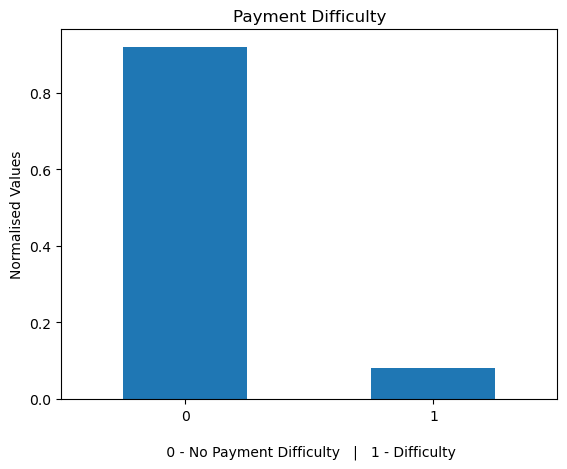

In [1069]:
appdata_df.TARGET.value_counts(normalize=True).plot.bar()
plt.title("Payment Difficulty")
plt.xlabel("\n 0 - No Payment Difficulty   |   1 - Difficulty")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values")
plt.show()

In [1070]:
# Checking all columns with object type data

appdata_df.columns[appdata_df.dtypes=="object"].tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


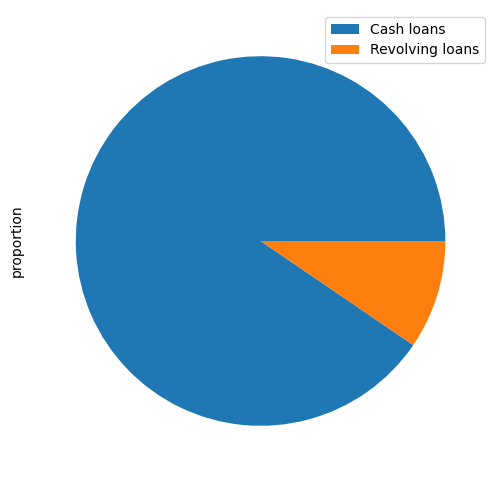

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


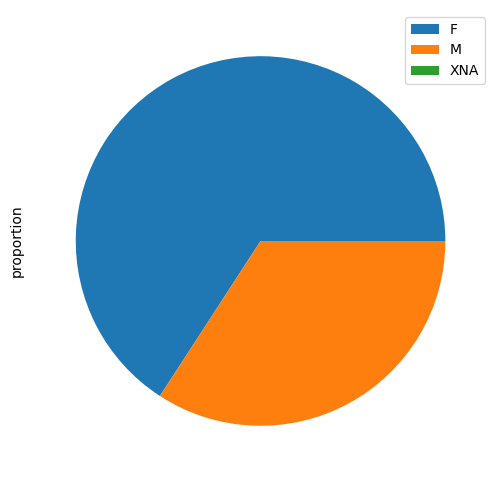

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


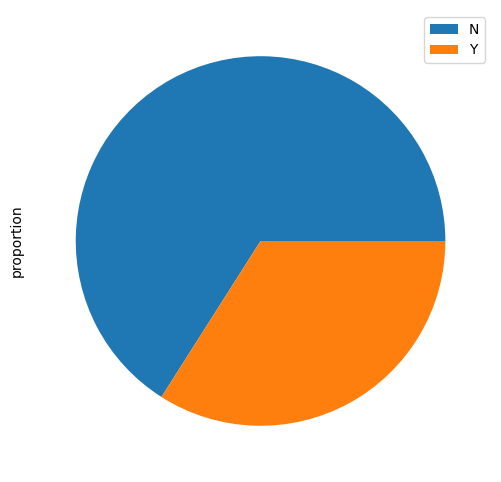

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


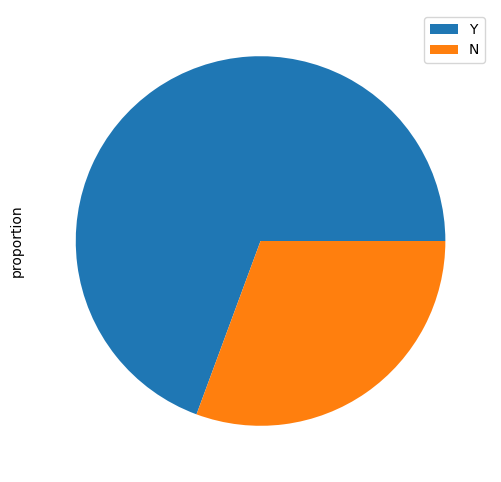

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


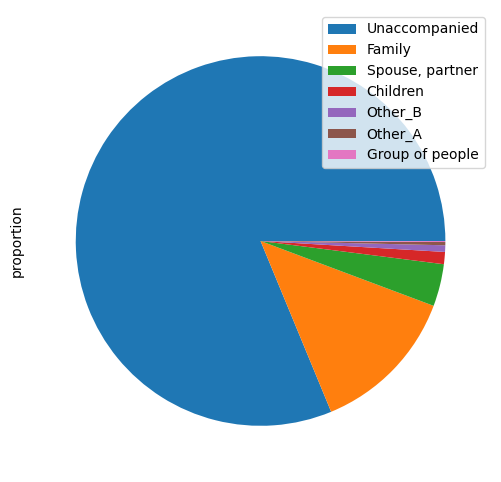

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


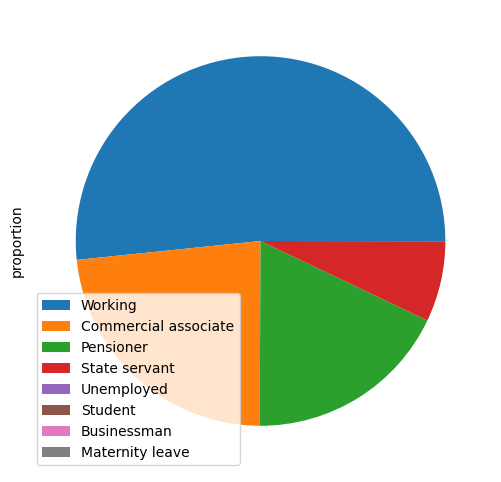

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


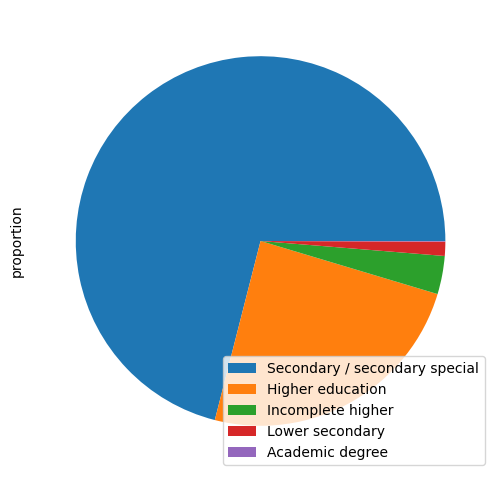

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


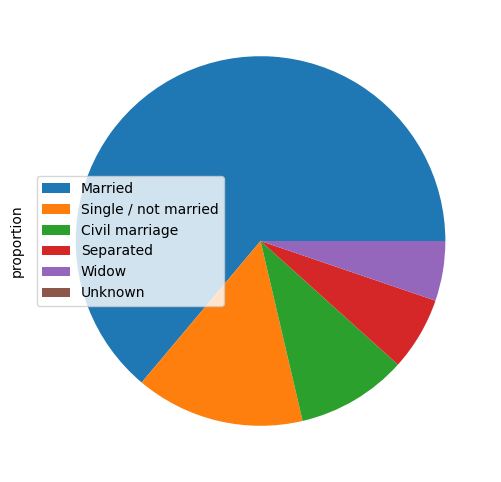

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


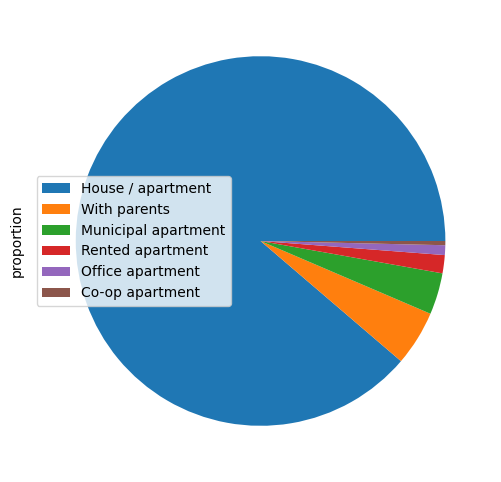

OCCUPATION_TYPE
NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


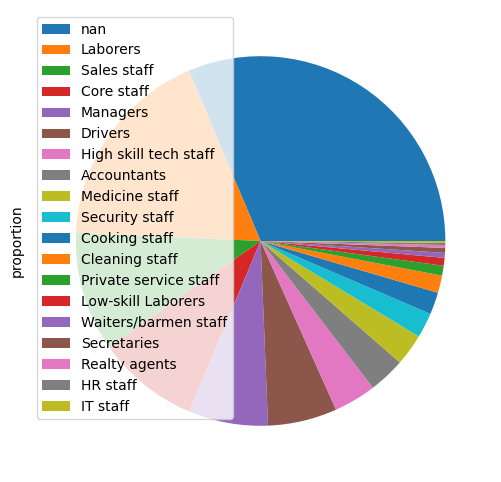

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


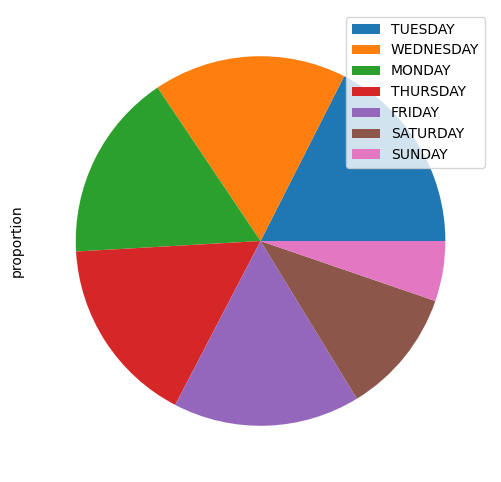

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

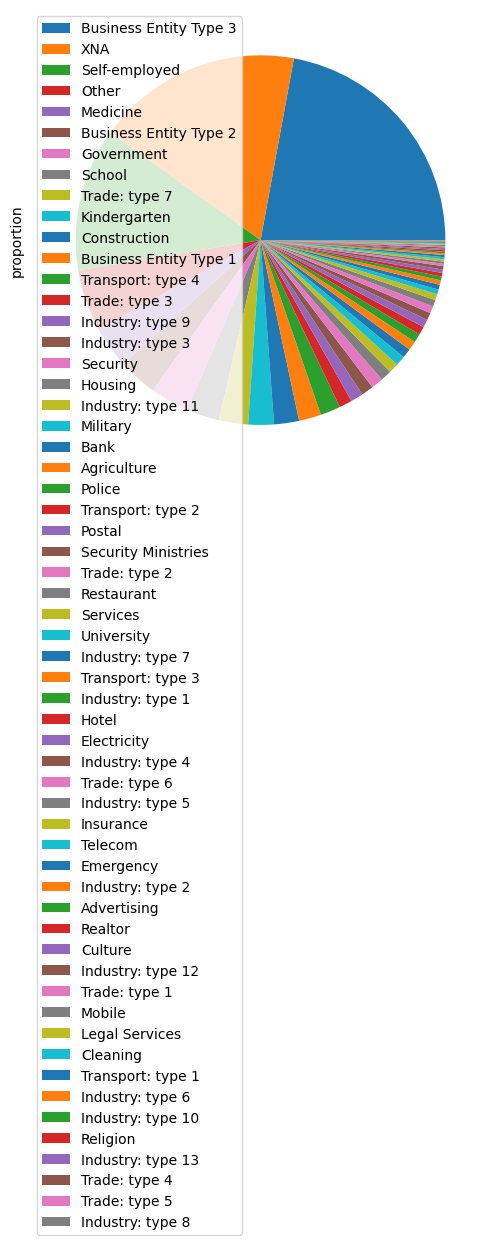

In [1071]:
#Checking all object types Variables and their values

for i in appdata_df.columns:
    if appdata_df[i].dtypes=="object":
        print(appdata_df[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        appdata_df[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
      

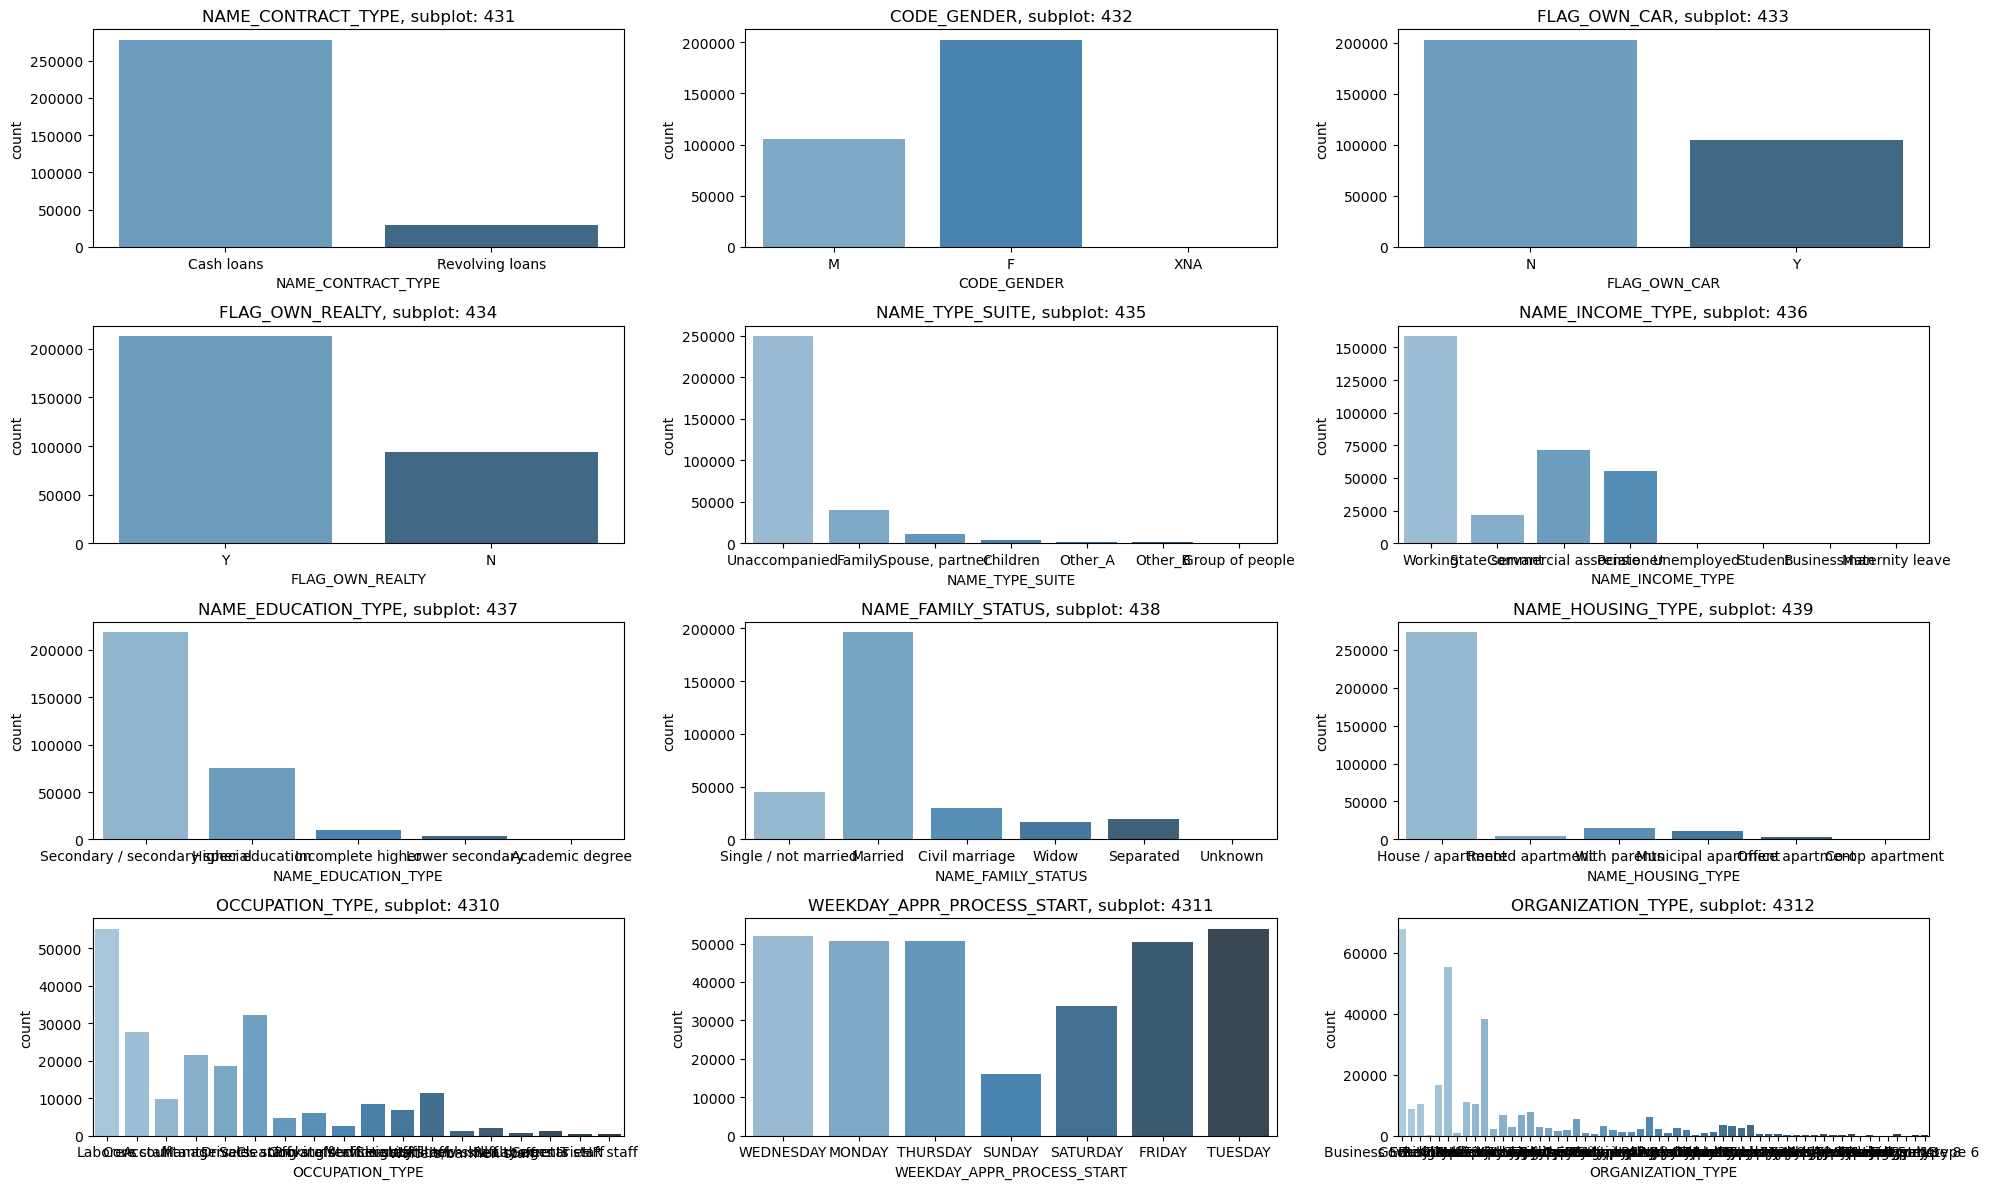

In [1072]:
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,12))

for i in appdata_df.columns:
    if appdata_df[i].dtypes=="object":

        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.countplot(x=i, data=appdata_df, palette="Blues_d")
        c = c + 1

fig.tight_layout()
plt.show()

##### From the above plot analysis, points to be noted:
1. The majority of loans (90%) are cash loans, surpassing the proportion of revolving loans.
2. Notably, 65% of loan recipients are females, while males constitute only 34%. This gender disparity in loan uptake warrants further investigation.
3. A significant portion (65%) of applicants do not own a car.
4. Conversely, 69% of applicants own their living quarters.
5. Approximately 81% of applicants applied for loans with accompaniment.
6. Although the majority are employed, 18% of applicants are pensioners.
7. The most common educational attainment among applicants is secondary education, accounting for 71%.
8. About 63% of applicants are married.
9. Notably, 31% of applicants did not disclose their occupation type, indicating potential variability in employment statuses within the dataset.	  
    

In [1073]:
appdata_df['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [1074]:
#FLAG_OWN_CAR' & 'FLAG_OWN_REALTY' must to be changed to Binary from yes/no

appdata_df['OWN_CAR_flag']=np.where(appdata_df.FLAG_OWN_CAR =="Y",1,0)
appdata_df['OWN_REALTY_flag']= np.where(appdata_df.FLAG_OWN_REALTY =="Y",1,0)
appdata_df['OWN_CAR_flag'].value_counts()

OWN_CAR_flag
0    202924
1    104587
Name: count, dtype: int64

In [1075]:
appdata_df.OWN_REALTY_flag.dtype

dtype('int32')

In [1076]:
appdata_df.columns[appdata_df.dtypes=="int64"].tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [1077]:
##Deleting all the Flag columns 

for i in appdata_df.columns:
    if i.startswith("FLAG"):
        appdata_df.drop(columns=i, inplace=True)
        
appdata_df.shape

(307511, 46)

#### Standardising 

In [1078]:
#Converting DAYS_BIRTH to +ve and converting days to years. Column renamed to AGE_IN_YEARS
appdata_df.DAYS_BIRTH=appdata_df.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
appdata_df.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)
appdata_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [1079]:
# Binning AGE and Creating new column "AGE_GROUP"

appdata_df['AGE_GROUP']= pd.cut(appdata_df.AGE_IN_YEARS,bins=[15,25,35,45,55,65,75])

appdata_df['AGE_GROUP'].value_counts(normalize=True)

AGE_GROUP
(35, 45]    0.274010
(25, 35]    0.235533
(45, 55]    0.228252
(55, 65]    0.196812
(15, 25]    0.039781
(65, 75]    0.025612
Name: proportion, dtype: float64

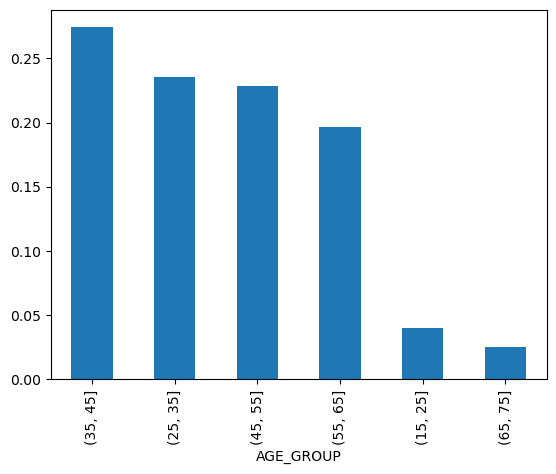

In [1080]:
appdata_df['AGE_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

In [1081]:
# Binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"

appdata_df['INCOME_GROUP']= pd.qcut(appdata_df['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

appdata_df['INCOME_GROUP'].value_counts(normalize=True)

INCOME_GROUP
Medium      0.274143
High        0.245562
Low         0.218486
VeryHigh    0.153224
VeryLow     0.108585
Name: proportion, dtype: float64

##### **Data Correction**

In [1082]:
# Binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"

appdata_df['INCOME_GROUP']= pd.qcut(appdata_df['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

appdata_df['INCOME_GROUP'].value_counts(normalize=True)# Convert 'DAYS_REGISTRATION' and 'DAYS_ID_PUBLISH' columns to positive numbers and years
appdata_df['YEARS_REGISTRATION'] = appdata_df['DAYS_REGISTRATION'].apply(lambda x: abs(x) // 365.25)
appdata_df['YEARS_ID_PUBLISH'] = appdata_df['DAYS_ID_PUBLISH'].apply(lambda x: abs(x) // 365.25)

# Rename the columns accordingly
appdata_df.rename({'DAYS_REGISTRATION': 'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH': 'YEARS_ID_PUBLISH'}, axis=1, inplace=True)


In [1083]:
#DAYS_LAST_PHONE_CHANGE changing to positive
appdata_df.DAYS_LAST_PHONE_CHANGE = appdata_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [1084]:
appdata_df.DAYS_EMPLOYED=appdata_df.DAYS_EMPLOYED.apply(lambda x: abs(x//365.25))
appdata_df.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, axis=1, inplace=True)

a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15, 12))

for i in appdata_df.columns:
    if str(appdata_df[i].dtypes) in ["int64", "int32"]:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(appdata_df[i])
        c = c + 1

fig.tight_layout()
plt.show()


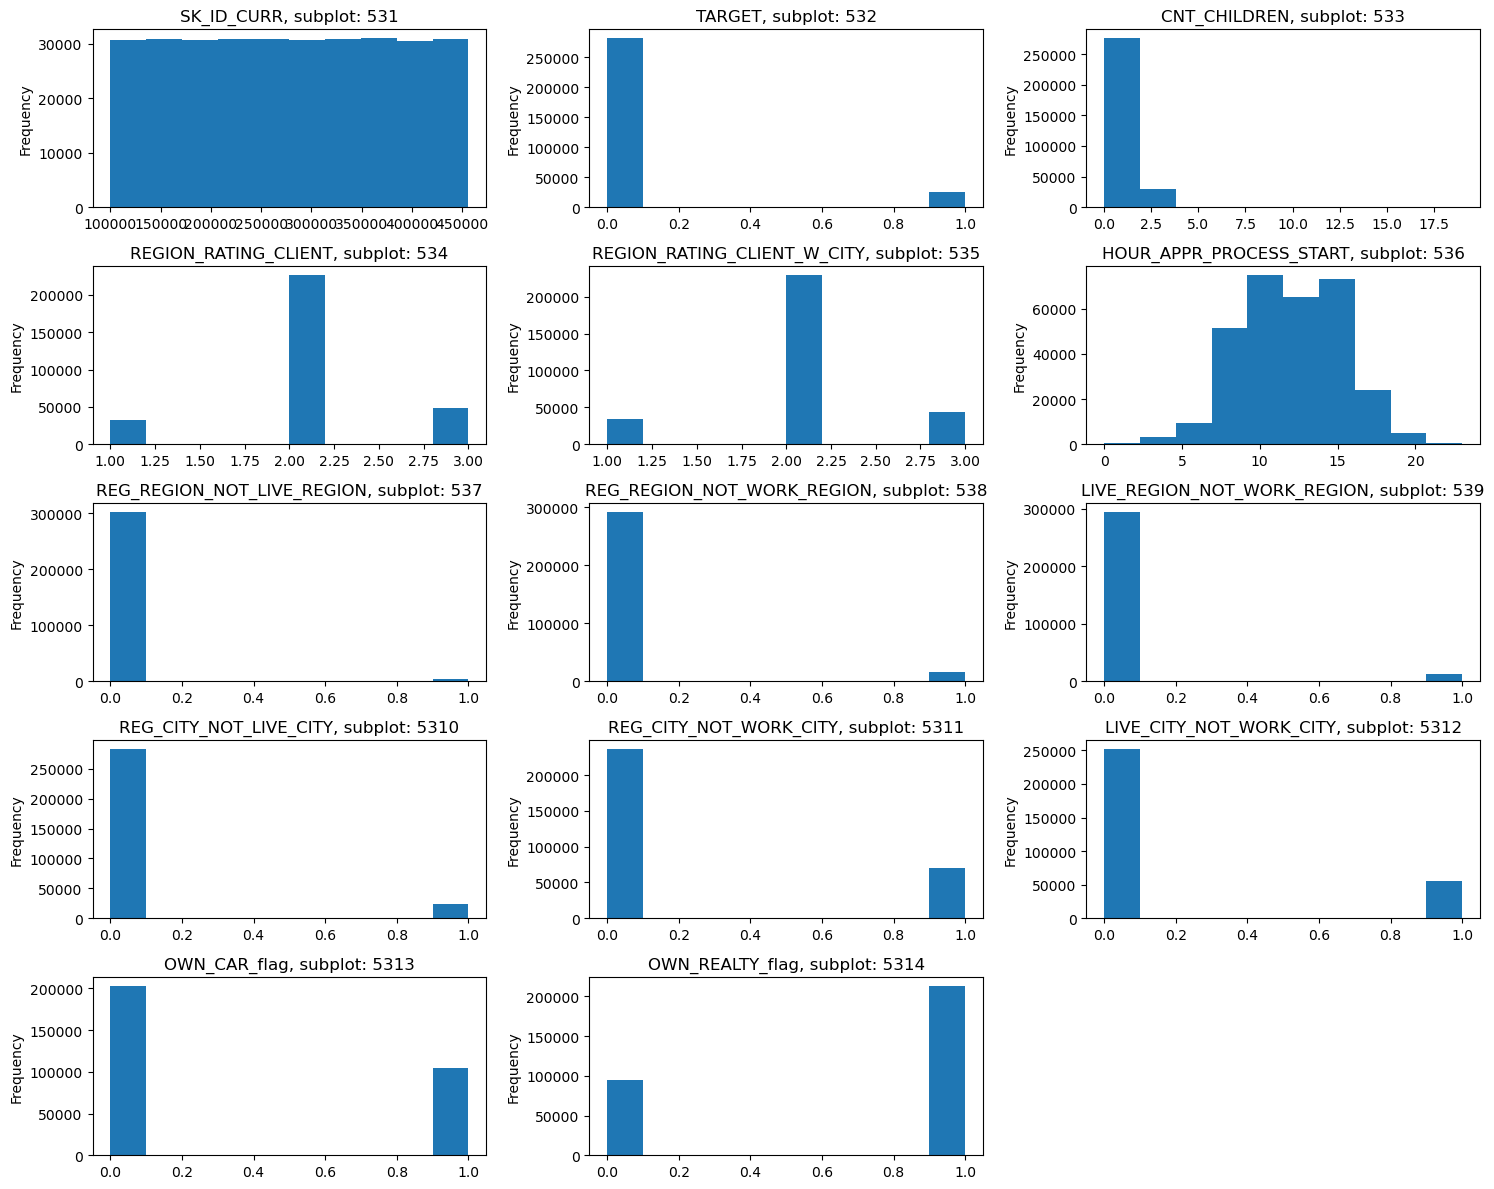

In [1085]:

# INT Data - Histogram - Analysis by plotting Histograms

a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in appdata_df.columns:
    if str(appdata_df[i].dtypes) in ["int64", "int32"]:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        appdata_df[i].plot.hist()
        c = c + 1

fig.tight_layout()
plt.show()

In [1086]:
appdata_df.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [1087]:
appdata_df['CNT_CHILDREN'].value_counts()
                    

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

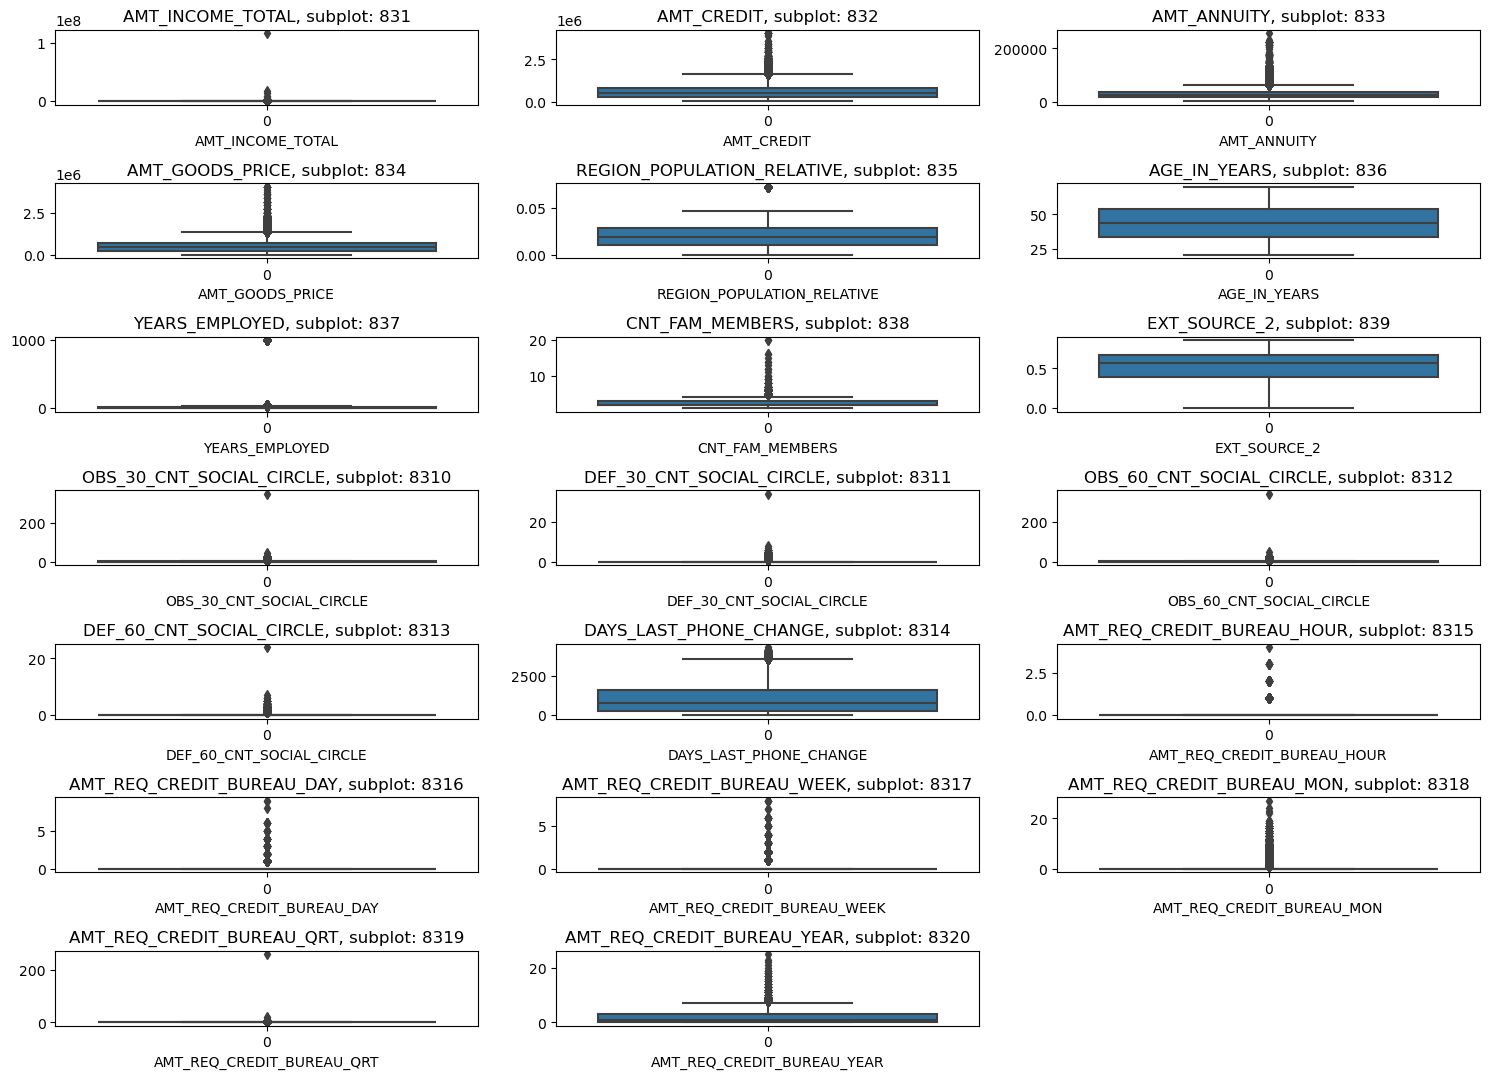

In [1088]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in appdata_df.columns:
     if str(appdata_df[i].dtypes) in ["float64", "float32"]:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(data =appdata_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

In [1089]:
outlier_col=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_EMPLOYED','DAYS_LAST_PHONE_CHANGE']

# Loop through each column
for i in outlier_col:
    print("\n")
    # Print column description
    print(appdata_df[i].describe())
    print("\n")
 
    # Print value counts for each unique value in the column
    # Dropna=False includes NaN values in the counts
    # Normalize=True returns the relative frequencies instead of counts
    print(appdata_df[i].value_counts(dropna=False, normalize=True))
    print("\n")




count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


AMT_INCOME_TOTAL
135000.0    0.116256
112500.0    0.100871
157500.0    0.086358
180000.0    0.080384
90000.0     0.073113
              ...   
117324.0    0.000003
64584.0     0.000003
142897.5    0.000003
109170.0    0.000003
113062.5    0.000003
Name: proportion, Length: 2548, dtype: float64




count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


AMT_CREDIT
450000.0     0.031573
675000.0     0.028867
225000.0     0.026542
180000.0     0.023876
270000.0     0.023547
               ...   
487318.5     0.000003
630400.5     0.000003
1875276.0    0.000003
1395895.5    0.000003
1391130.0    0.000003
Name: proportion, 

In [1090]:
outliers_col_df = pd.DataFrame(outlier_col)
outliers_col_df

0
0        AMT_INCOME_TOTAL
1              AMT_CREDIT
2             AMT_ANNUITY
3         AMT_GOODS_PRICE
4          YEARS_EMPLOYED
5  DAYS_LAST_PHONE_CHANGE

In [1092]:
# Creating list with names of categorical nominal , numerical and categorical oridnal variables. This is being done to make codes lesser repeatitive
objvarList=[]
numvarList=[]
for i in appdata_df.columns:
    if str(appdata_df[i].dtypes) in ["object"]:
        objvarList.append(i)
    else:
        numvarList.append(i)

In [1093]:
catvarList = []

# Iterate over numeric variables
for i in numvarList:
    # Check the number of unique values in the column
    if np.any(appdata_df[i].nunique() < 4):
        # Convert the column to categorical type
        appdata_df[i] = appdata_df[i].astype("category")
        # Add the column name to catvarList
        catvarList.append(i)


In [1094]:
print("Numercial Columns :", numvarList) 
print("\n")

print("obj Columns :", objvarList) 
print("\n")

print("cat Columns :", catvarList) 

Numercial Columns : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_flag', 'OWN_REALTY_flag', 'AGE_GROUP', 'INCOME_GROUP', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']


obj Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NA

In [1095]:
# Removing income group and age group as these have binned data. Code_gender and Target are ordinal and hence move to differnt list


catvarList.append('CODE_GENDER')

print("Numercial Columns :", numvarList) 
print("\n")

print("obj Columns :", objvarList) 
print("\n")

print("cat Columns :", catvarList) 

Numercial Columns : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_flag', 'OWN_REALTY_flag', 'AGE_GROUP', 'INCOME_GROUP', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']


obj Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NA

##  <font color=blue> Dataframe must be divided TWO for  Target 1 and Target 0 
Target variable 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample <br>
Target variable 0 - all other cases, ie no payment difficulties

In [1096]:
df_cat_0=appdata_df[appdata_df['TARGET']==0]
df_cat_0.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003      0         Cash loans           F             0   
2      100004      0    Revolving loans           M             0   
3      100006      0         Cash loans           F             0   
4      100007      0         Cash loans           M             0   
5      100008      0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   
5           99000.0    490495.5      27517.5         454500.0   

   NAME_TYPE_SUITE  ... AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1           Family  ...                        0.0                       0.0   
2    Unaccompanied  ...                        0.0                       0.0   
3    Unaccompanied  ...                        0.0                       0.0   
4    Unaccompanied  ...                        0.0                       0.0   
5  Spouse, partner  ...                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  OWN_CAR_flag  \
1                       0.0                        0.0             0   
2                       0.0                        0.0             1   
3                       0.0                        0.0             0   
4                       0.0                        0.0             0   
5                       1.0                        1.0             0   

   OWN_REALTY_flag  AGE_GROUP  INCOME_GROUP  YEARS_REGISTRATION  \
1                0   (45, 55]      VeryHigh                 3.0   
2                1   (45, 55]       VeryLow                11.0   
3                1   (45, 55]        Medium                26.0   
4                1   (45, 55]        Medium                11.0   
5                1   (45, 55]           Low                13.0   

  YEARS_ID_PUBLISH  
1              0.0  
2              6.0  
3              6.0  
4              9.0  
5              1.0  

[5 rows x 50 columns]

In [1097]:
df_cat_1=appdata_df[appdata_df['TARGET']==1]
df_cat_1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002      1         Cash loans           M             0   
26      100031      1         Cash loans           F             0   
40      100047      1         Cash loans           M             0   
42      100049      1         Cash loans           F             0   
81      100096      1         Cash loans           F             0   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           202500.0    406597.5      24700.5         351000.0   
26          112500.0    979992.0      27076.5         702000.0   
40          202500.0   1193580.0      35028.0         855000.0   
42          135000.0    288873.0      16258.5         238500.0   
81           81000.0    252000.0      14593.5         252000.0   

   NAME_TYPE_SUITE  ... AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0    Unaccompanied  ...                        0.0                       0.0   
26   Unaccompanied  ...                        0.0                       0.0   
40   Unaccompanied  ...                        0.0                       2.0   
42   Unaccompanied  ...                        0.0                       0.0   
81   Unaccompanied  ...                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  OWN_CAR_flag  \
0                        0.0                        1.0             0   
26                       2.0                        2.0             0   
40                       0.0                        4.0             0   
42                       0.0                        2.0             0   
81                       0.0                        0.0             0   

    OWN_REALTY_flag  AGE_GROUP  INCOME_GROUP  YEARS_REGISTRATION  \
0                 1   (25, 35]          High                 9.0   
26                1   (45, 55]           Low                17.0   
40                1   (45, 55]          High                 3.0   
42                0   (35, 45]        Medium                 0.0   
81                1   (65, 75]       VeryLow                14.0   

   YEARS_ID_PUBLISH  
0               5.0  
26              5.0  
40              2.0  
42             12.0  
81             11.0  

[5 rows x 50 columns]

### Univariate Analysis on Categorical Nominal to analyse both data frames

Graph for :  NAME_CONTRACT_TYPE


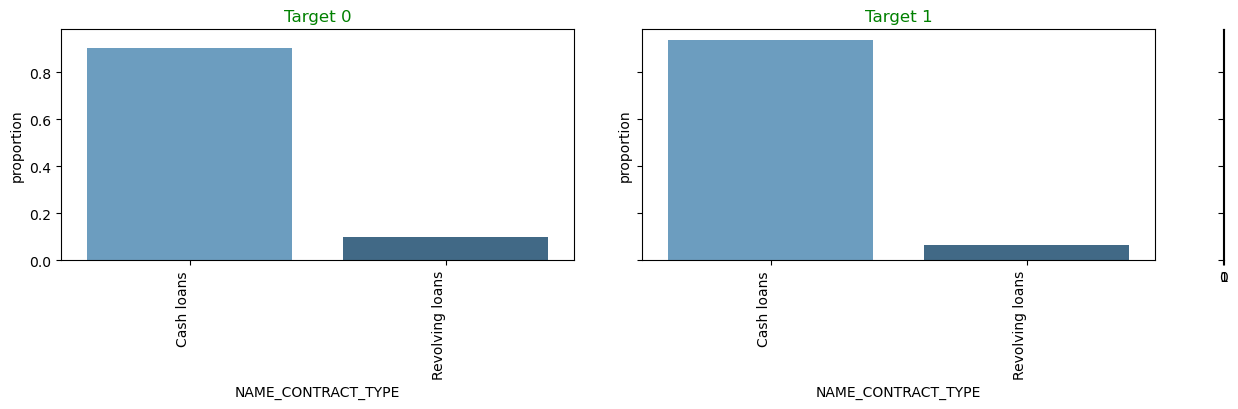

Graph for :  CODE_GENDER


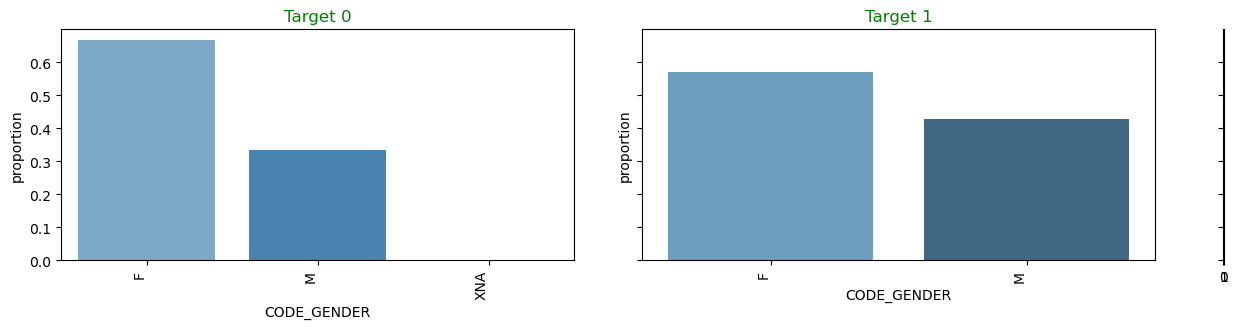

Graph for :  NAME_TYPE_SUITE


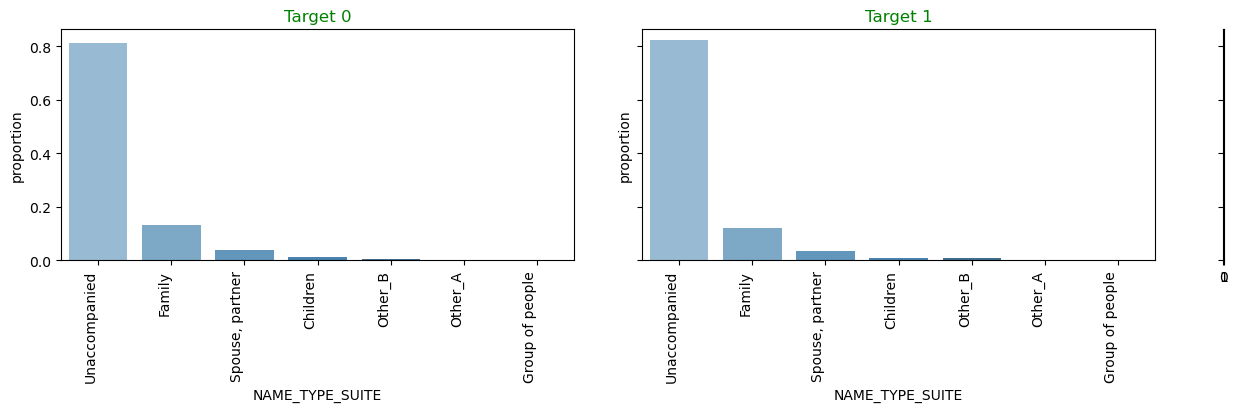

Graph for :  NAME_INCOME_TYPE


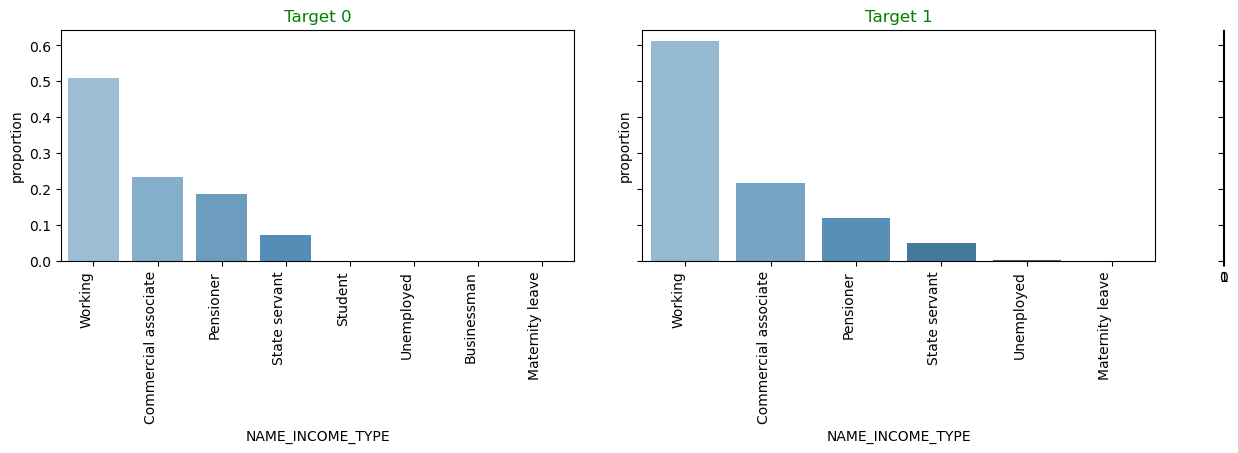

Graph for :  NAME_EDUCATION_TYPE


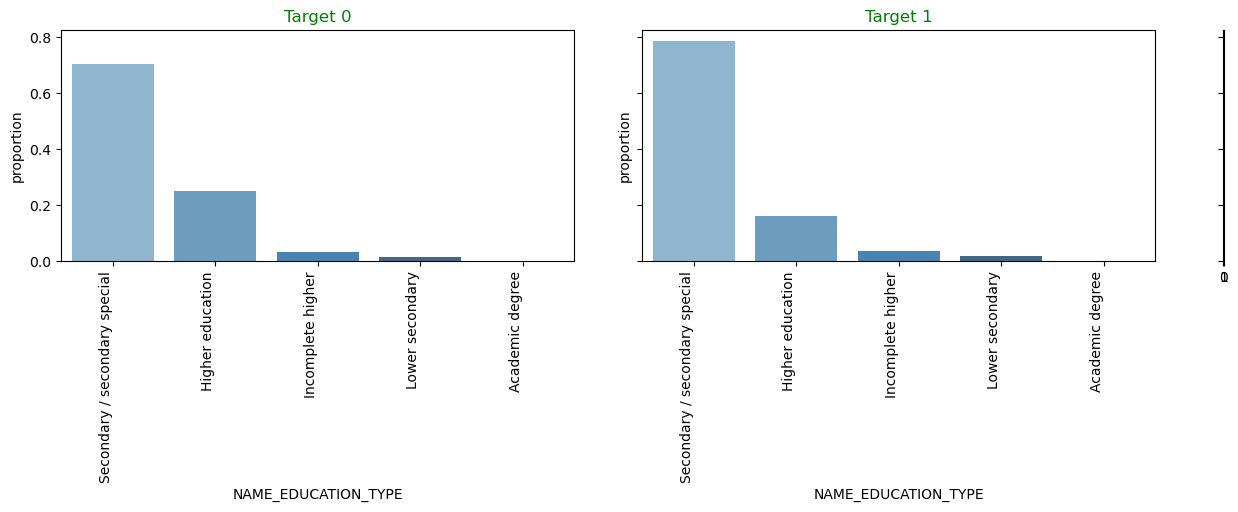

Graph for :  NAME_FAMILY_STATUS


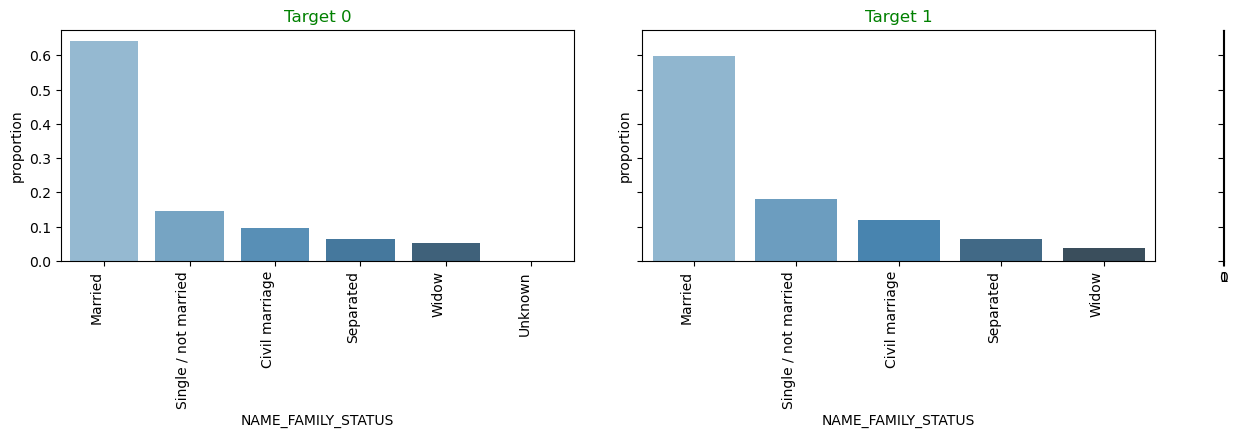

Graph for :  NAME_HOUSING_TYPE


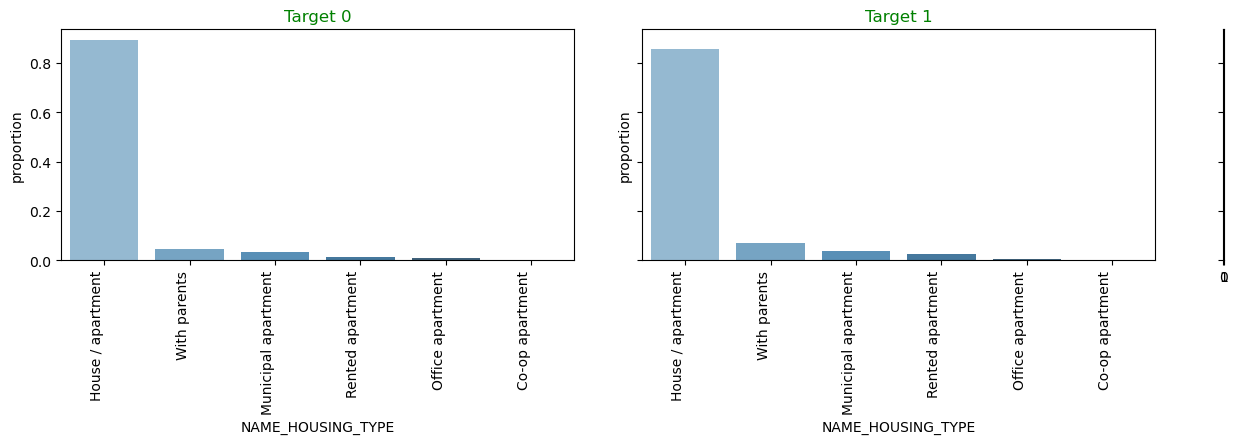

Graph for :  OCCUPATION_TYPE


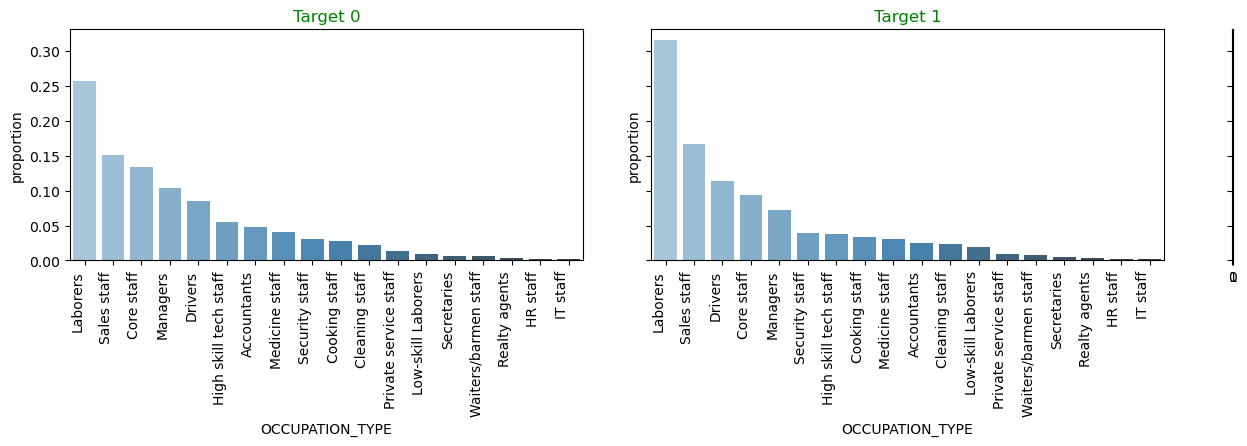

Graph for :  WEEKDAY_APPR_PROCESS_START


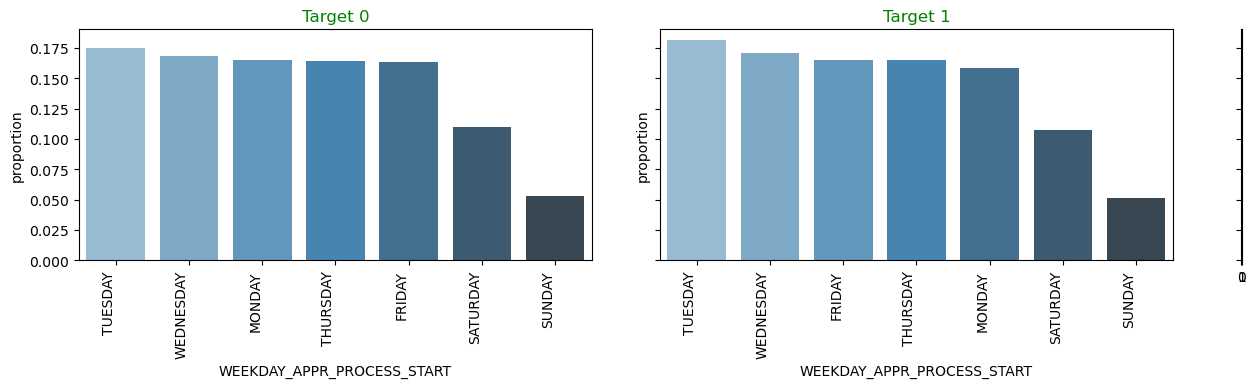

Graph for :  ORGANIZATION_TYPE


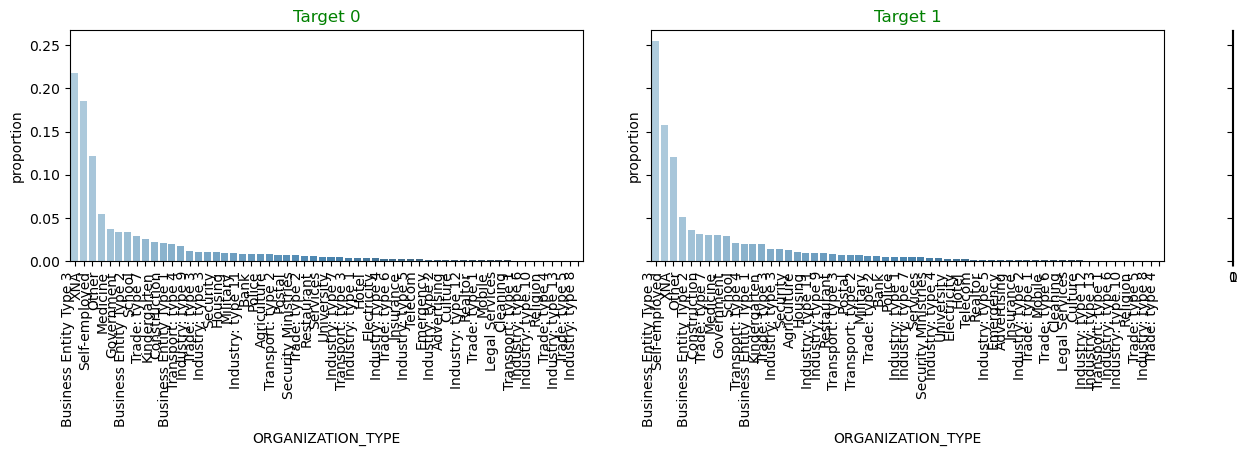

In [1098]:
 #Running loop and creating plots to analyse all Categorical Nominal variables

for i in objvarList:
    
    cat_num_0=df_cat_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,3))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=df_cat_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()   

##### **Few notable points**
    1.Contract Type: Cash loans comprise a significant portion of the company's portfolio, constituting approximately 85% for Target 0 and nearly 95% for Target 1.
    2.Type of Suit: Around 80-90% of applicants for both Target 0 and Target 1 apply for loans unaccompanied, suggesting it may not strongly correlate with payment default.
    3.Income Type: Approximately 50% of applicants in Target 0 and 60% in Target 1 have working income types.
    4.Education Level: Secondary education holders constitute the majority of loan applicants and about 90% of defaulting payments, warranting further analysis.
    5.Family Status: Nearly 60% of married applicants have defaulted on payments.
    6.Housing Type: Around 85-90% of applicants in both Target 0 and Target 1 reside in houses/apartments, indicating it may not be a significant factor influencing 
    7.payment default.
    8.Occupation Type: Labourers, sales staff, core staff, and drivers account for 50% of defaulters, with labourers being the highest percentage among applicants.
    9.Organization Type: Business entity type 3 and self-employed individuals contribute to 40% of defaulters, with the highest percentage of loan takers falling into this category.

tegory. 

    
    

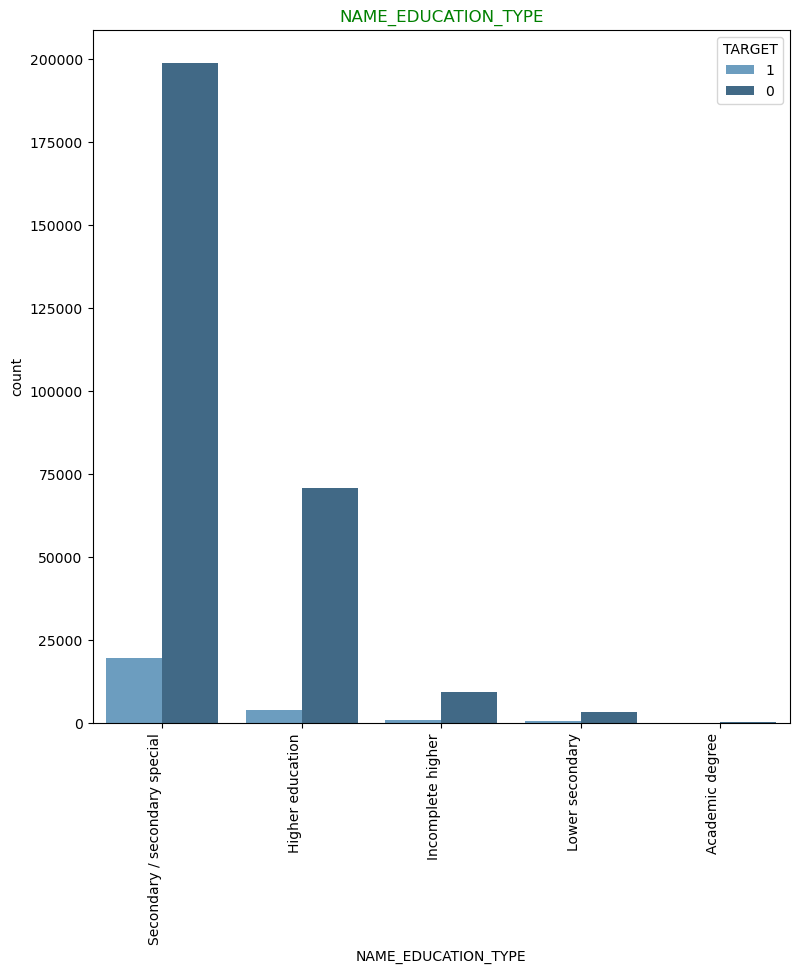

In [1099]:
plt.figure(figsize=(9,9))
appdata_df['TARGET'] = appdata_df['TARGET'].astype('string')
chart=sns.countplot(x='NAME_EDUCATION_TYPE', data=appdata_df, hue="TARGET", palette="Blues_d")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.axes.set_title('NAME_EDUCATION_TYPE',fontsize= 12,fontweight= 7,color='Green')
plt.show()

### Univariate Analysis on Categorical Ordered

Graph for :  TARGET


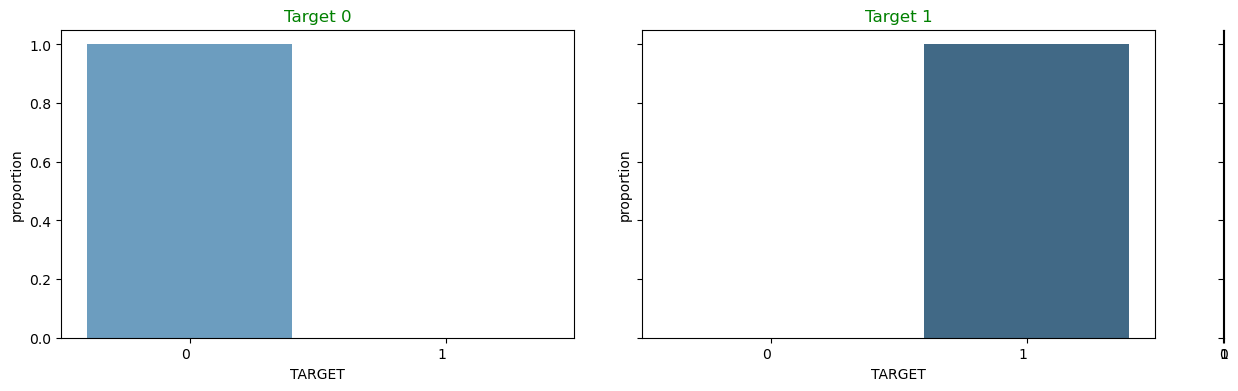

Graph for :  REGION_RATING_CLIENT


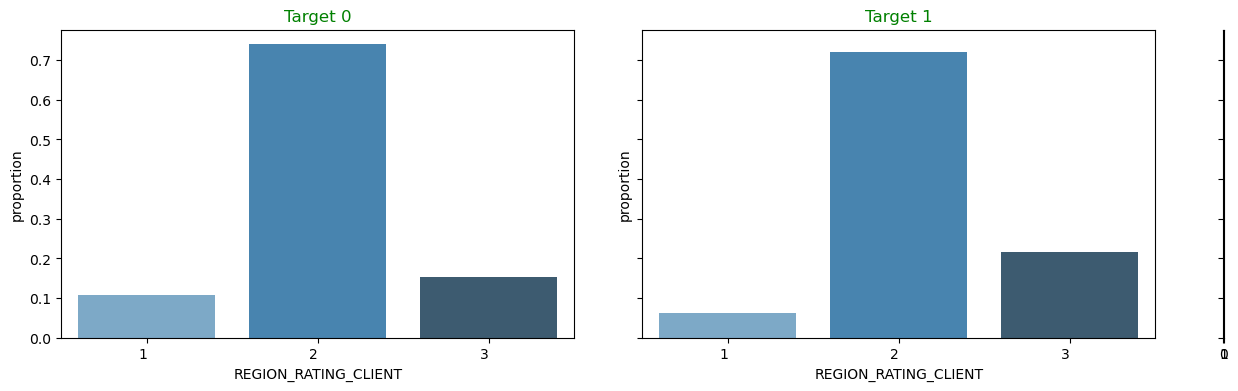

Graph for :  REGION_RATING_CLIENT_W_CITY


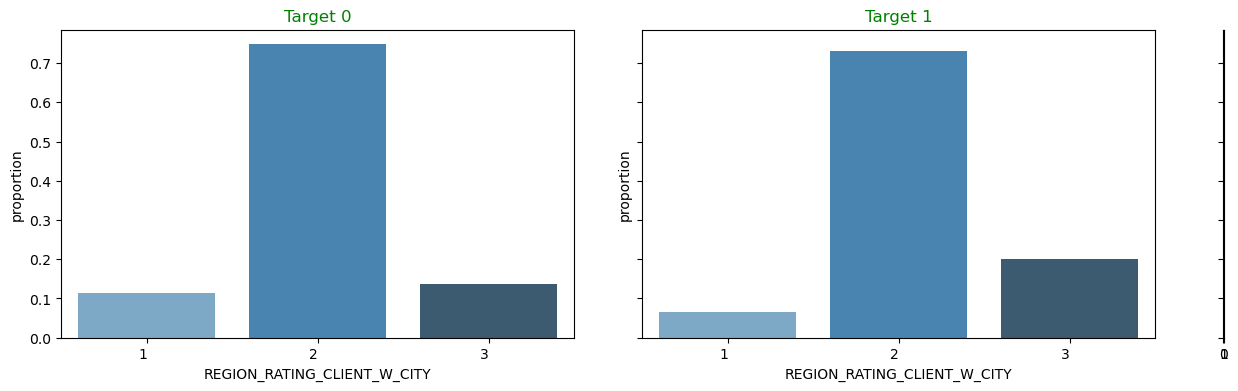

Graph for :  REG_REGION_NOT_LIVE_REGION


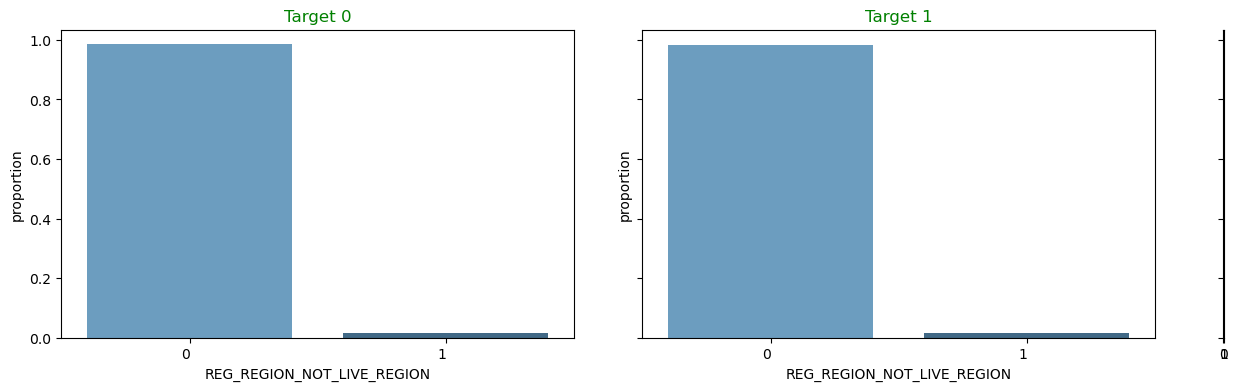

Graph for :  REG_REGION_NOT_WORK_REGION


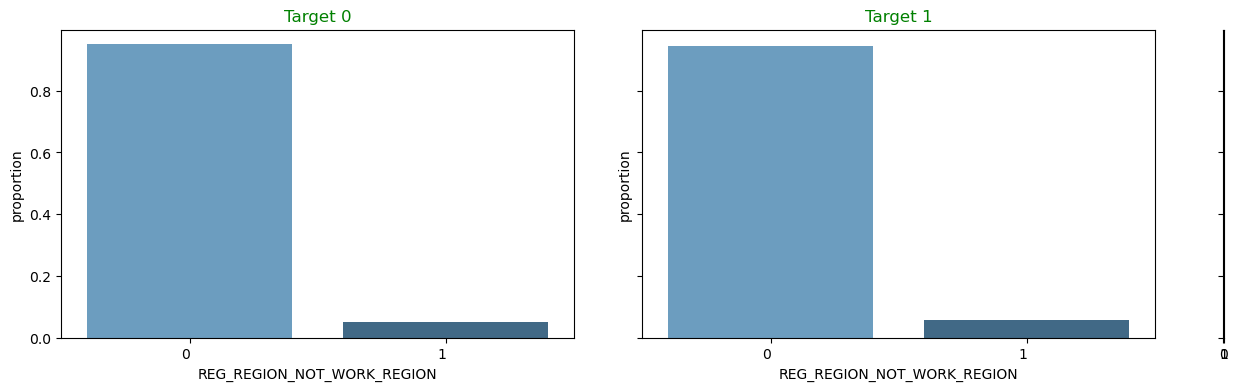

Graph for :  LIVE_REGION_NOT_WORK_REGION


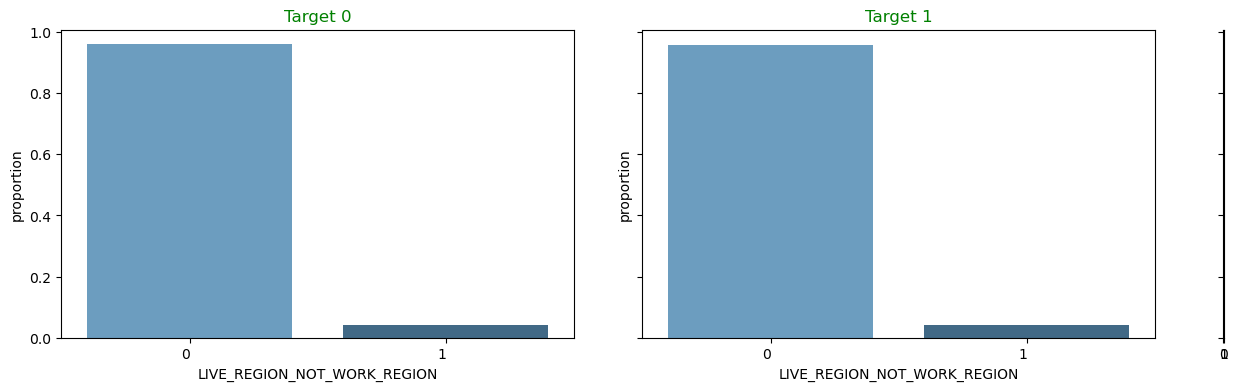

Graph for :  REG_CITY_NOT_LIVE_CITY


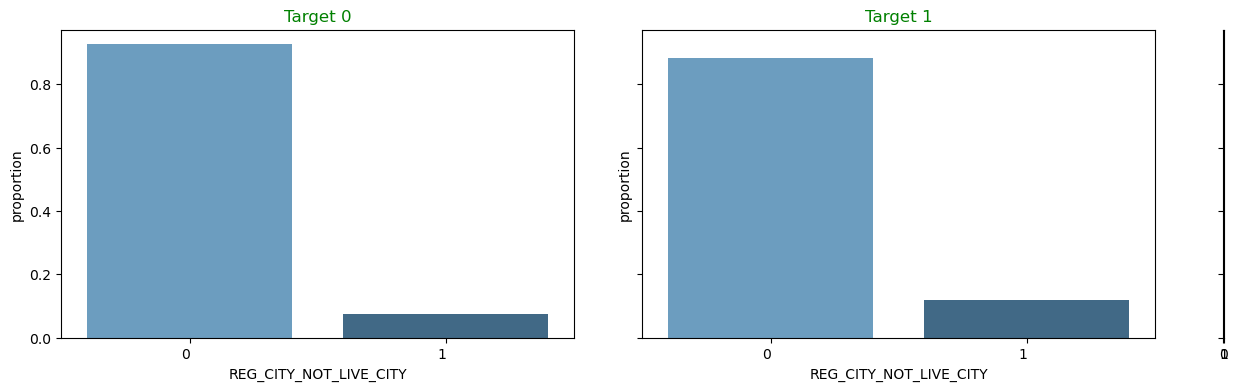

Graph for :  REG_CITY_NOT_WORK_CITY


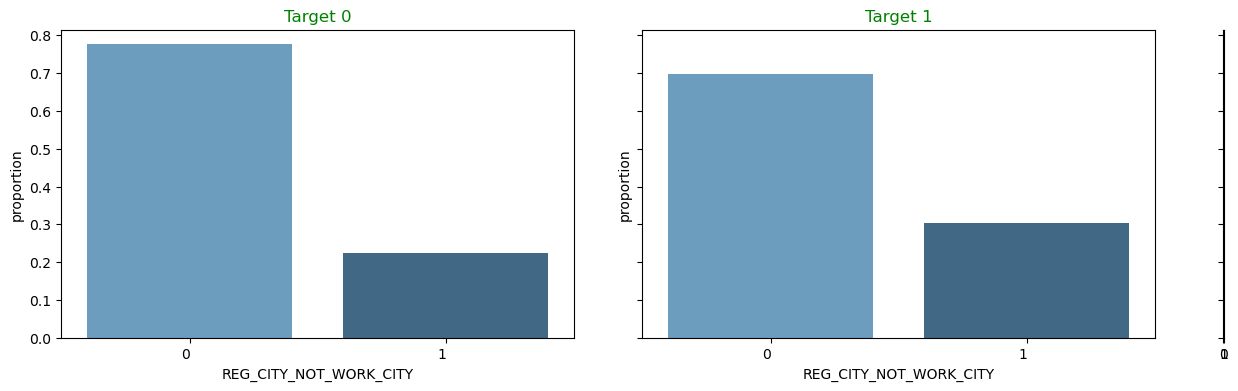

Graph for :  LIVE_CITY_NOT_WORK_CITY


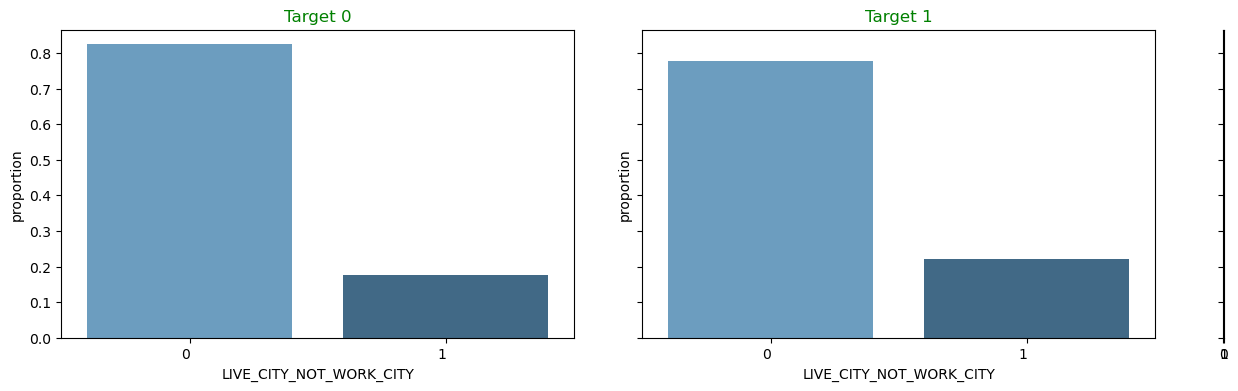

Graph for :  OWN_CAR_flag


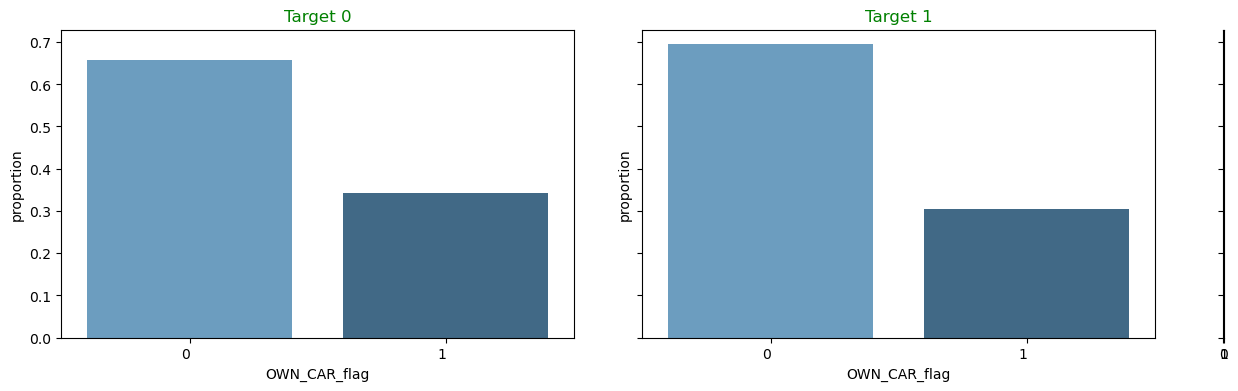

Graph for :  OWN_REALTY_flag


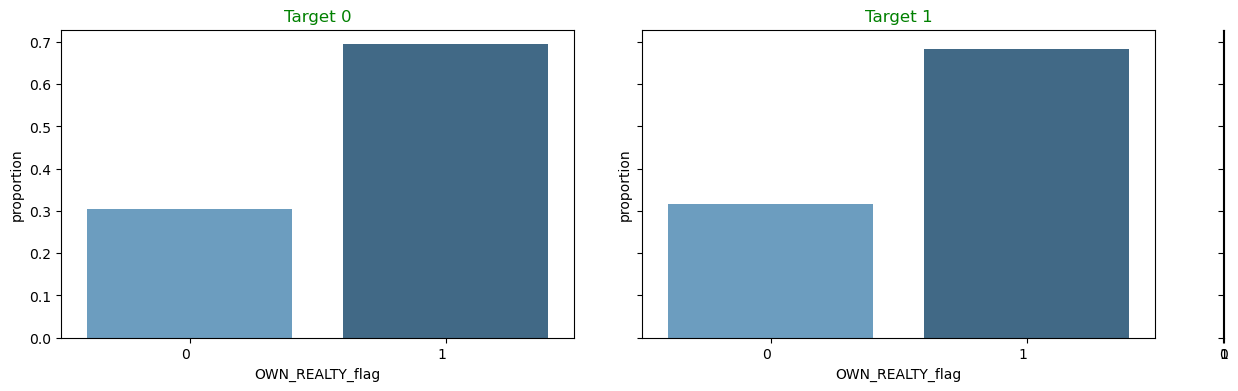

Graph for :  CODE_GENDER


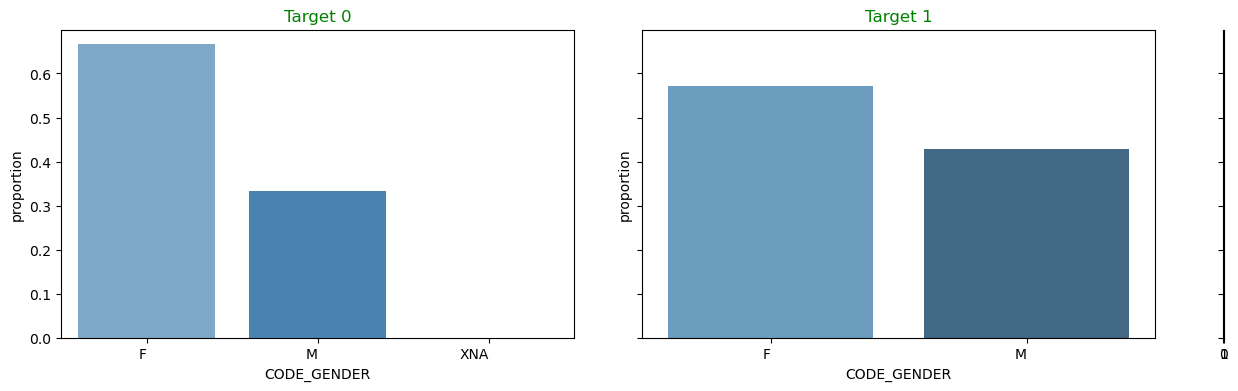

In [1100]:
for i in catvarList:
    cat_num_0=df_cat_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1,palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=df_cat_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2,palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

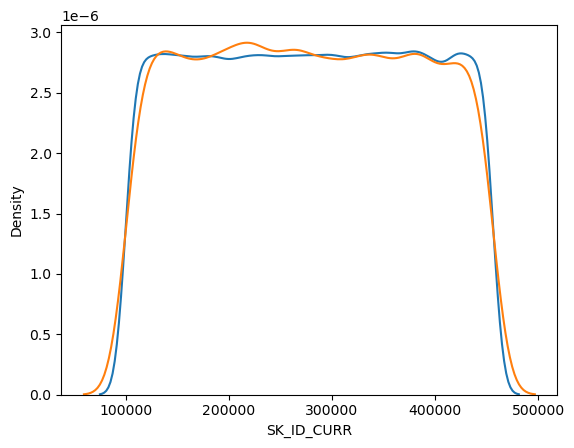

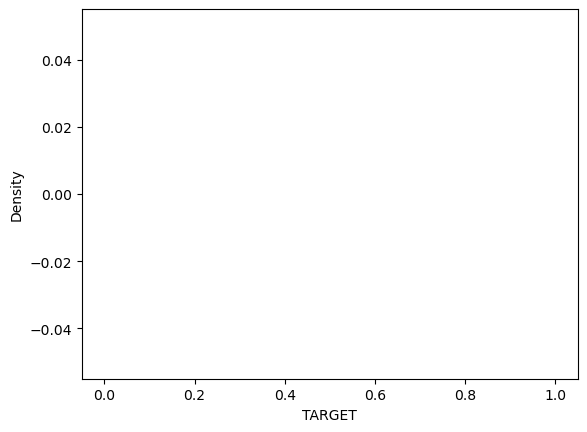

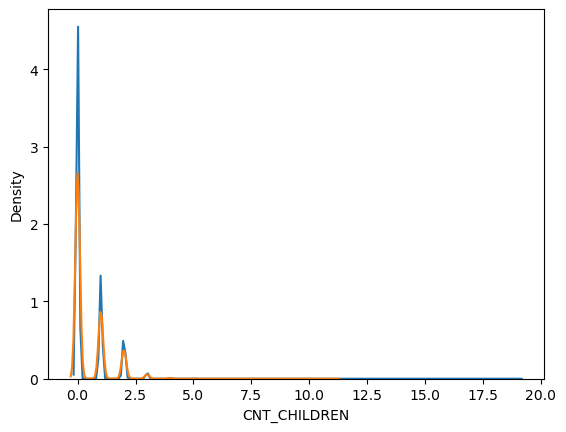

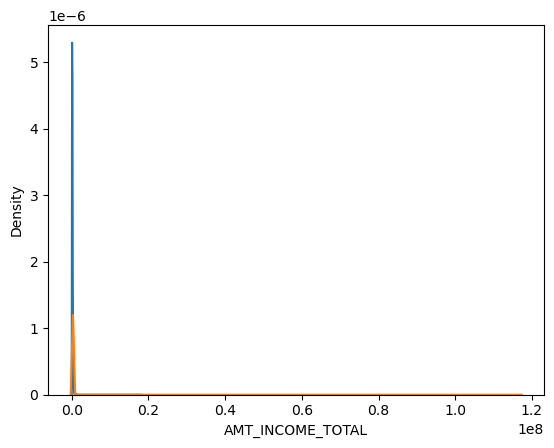

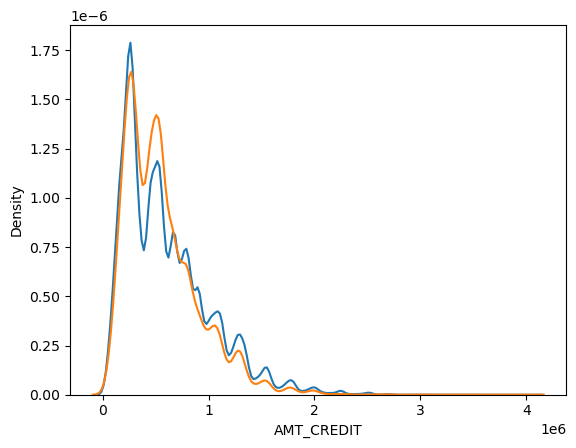

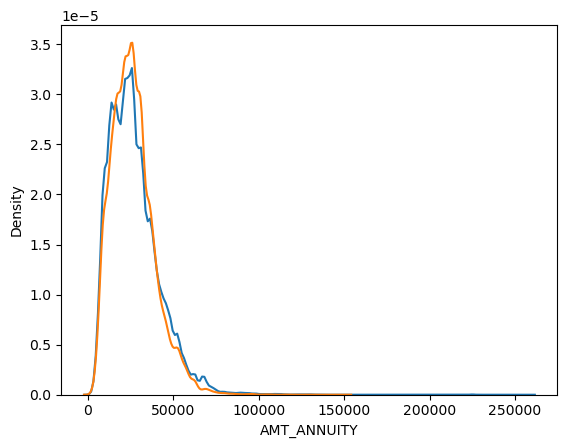

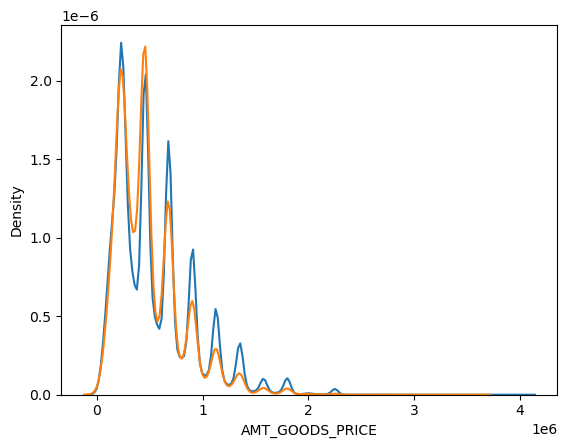

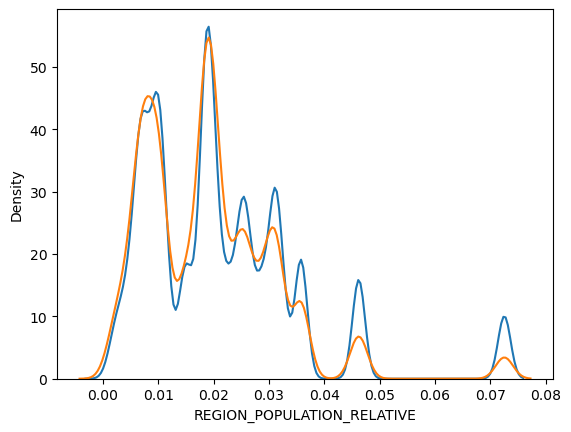

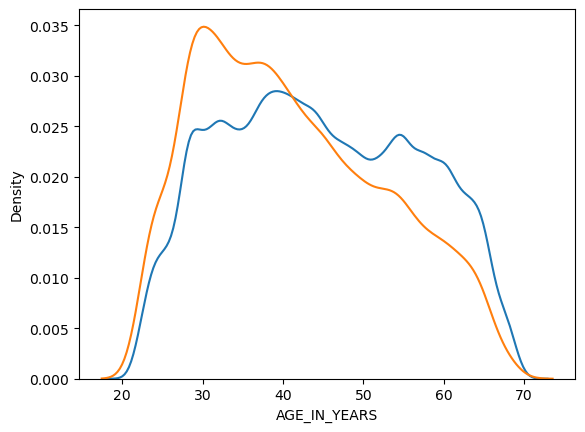

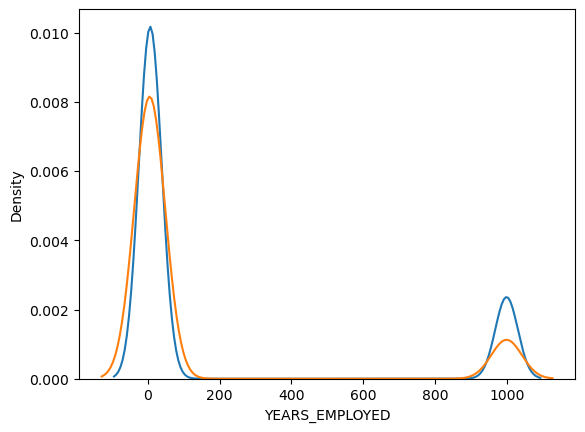

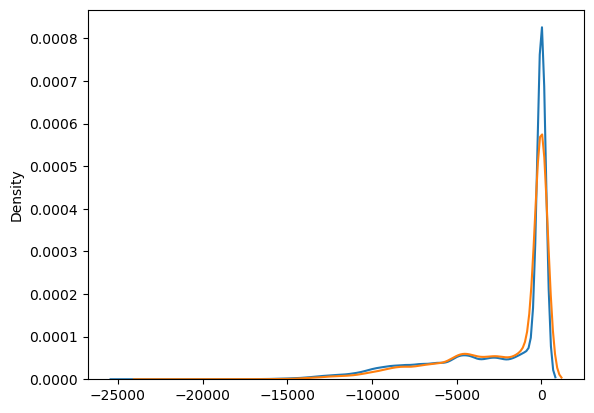

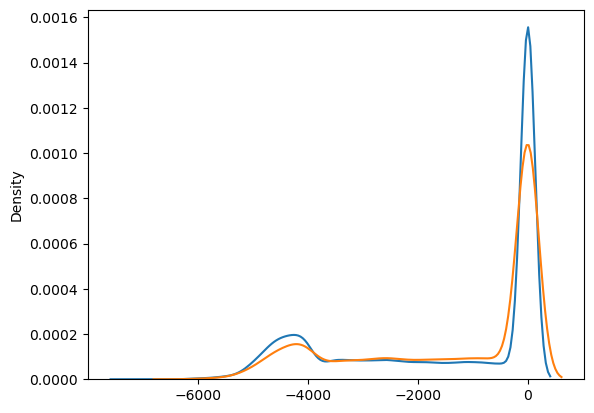

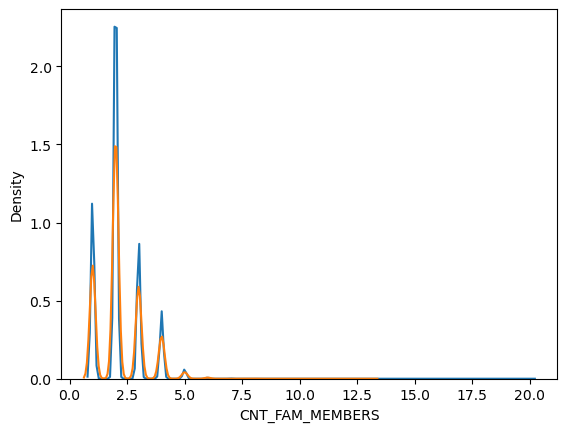

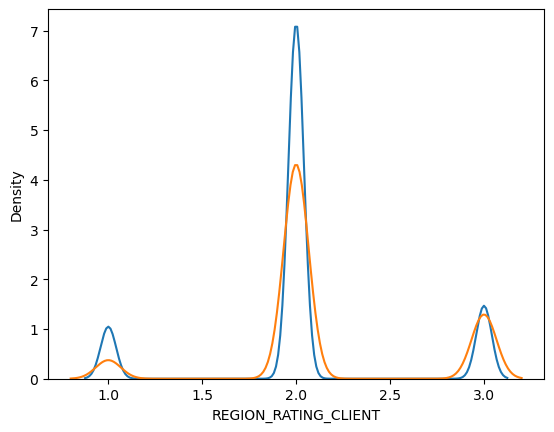

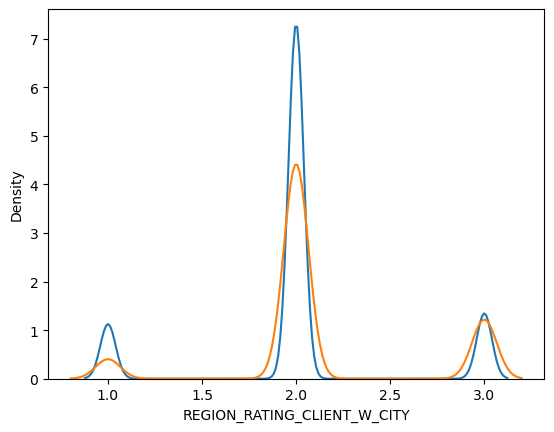

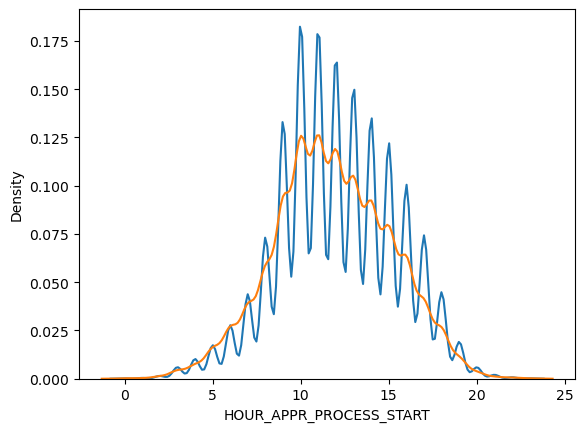

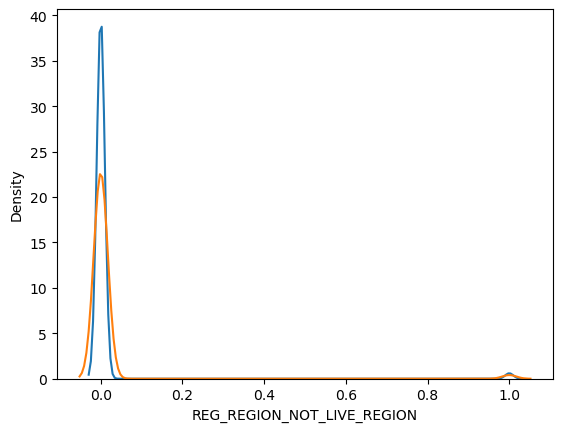

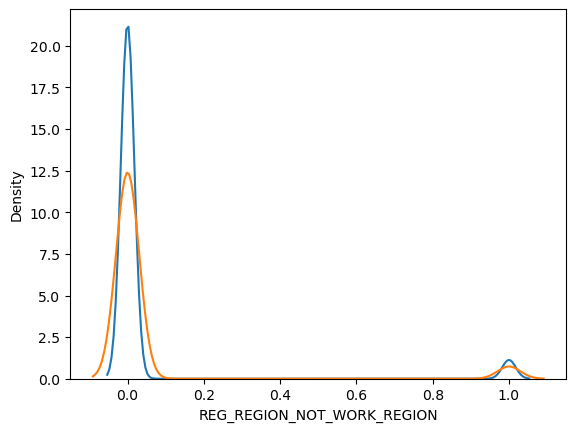

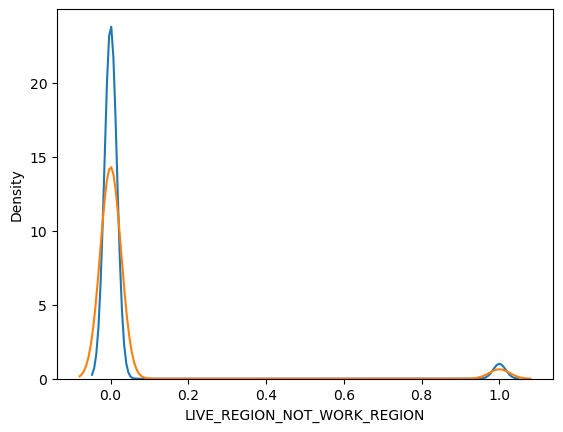

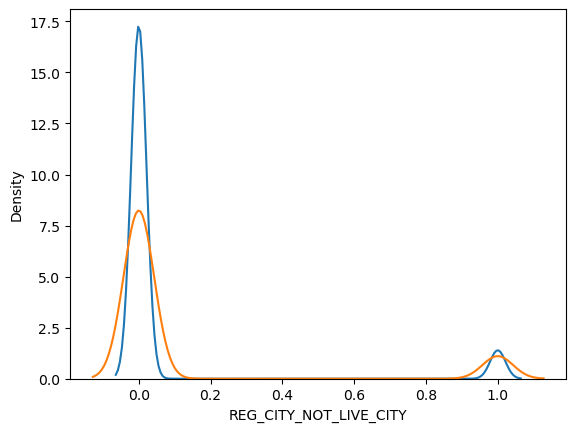

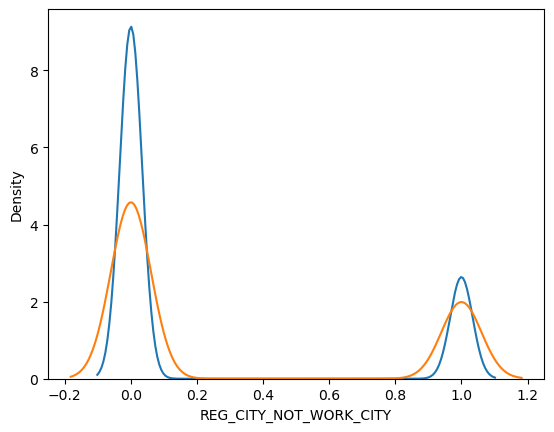

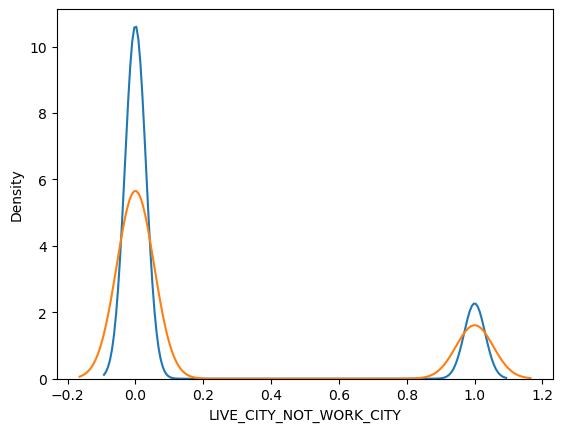

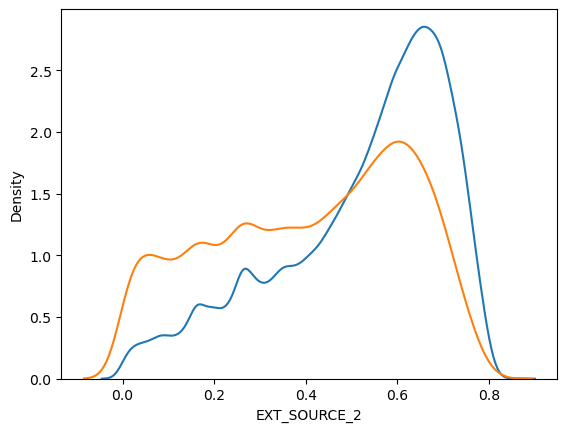

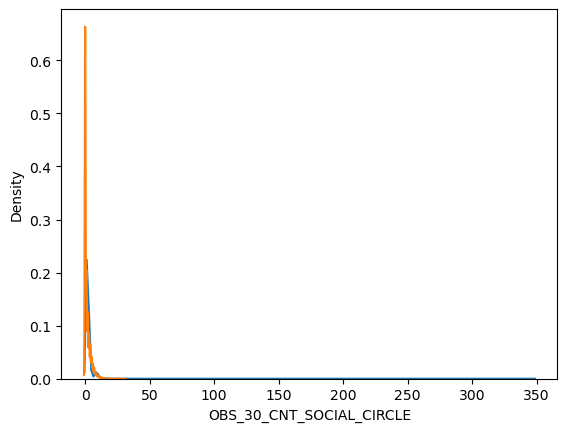

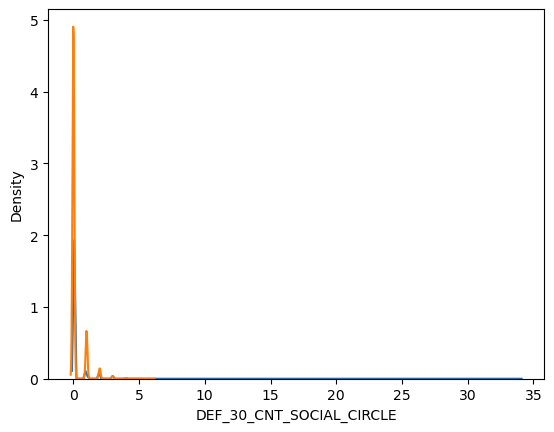

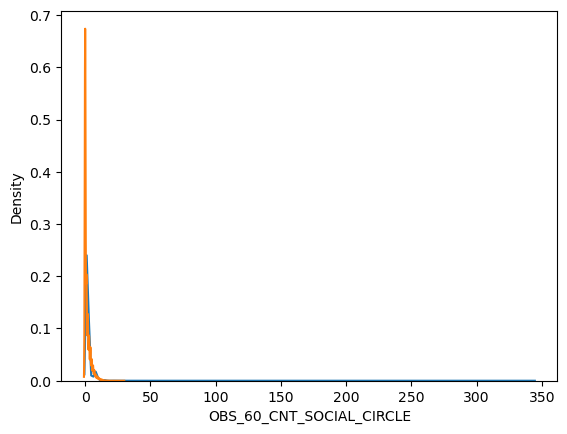

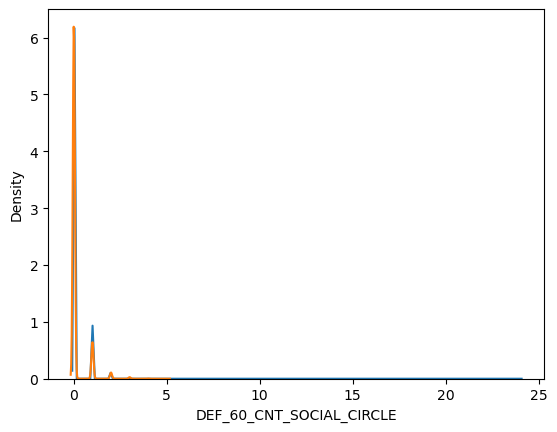

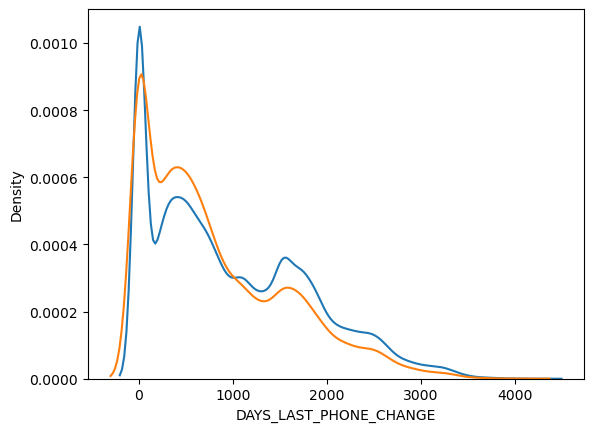

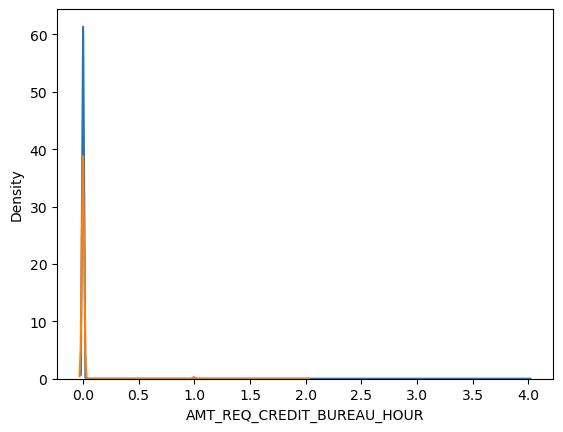

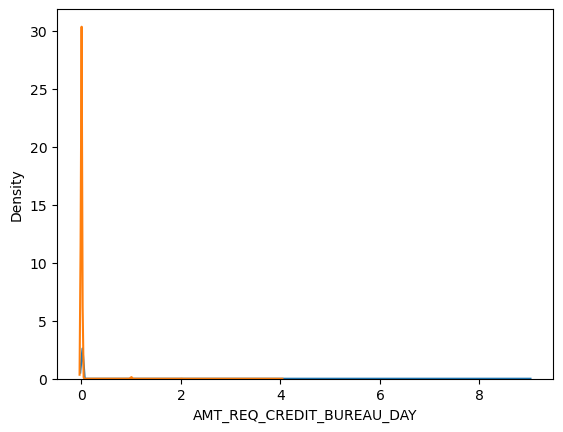

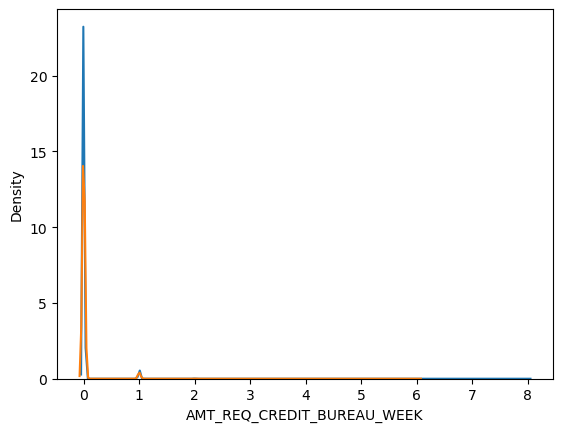

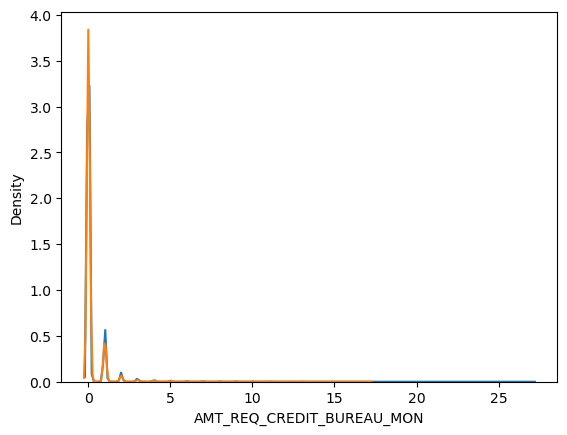

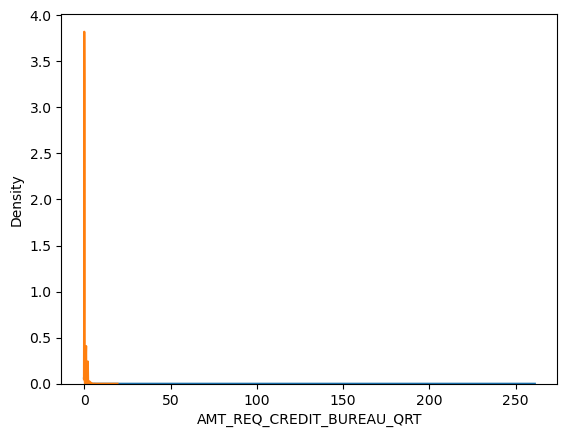

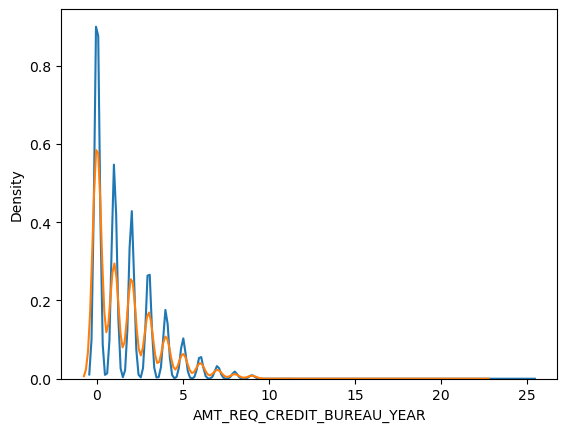

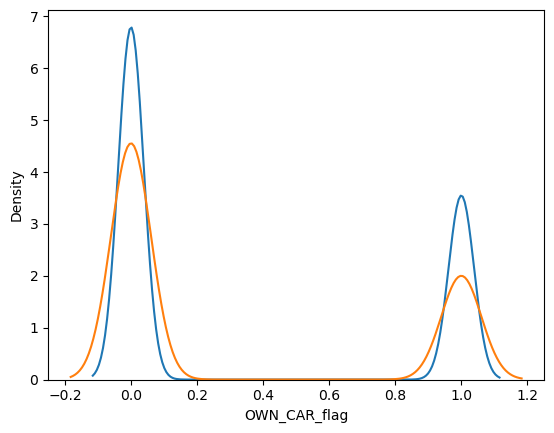

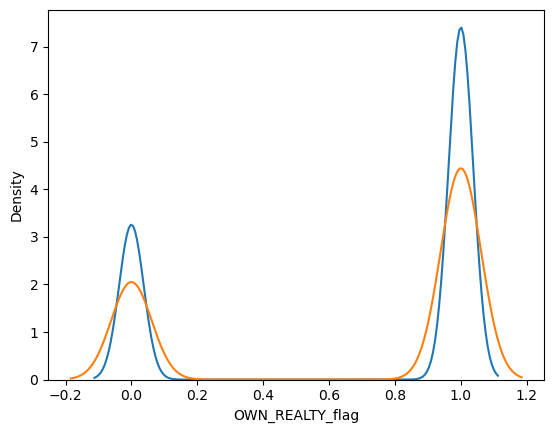

TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'

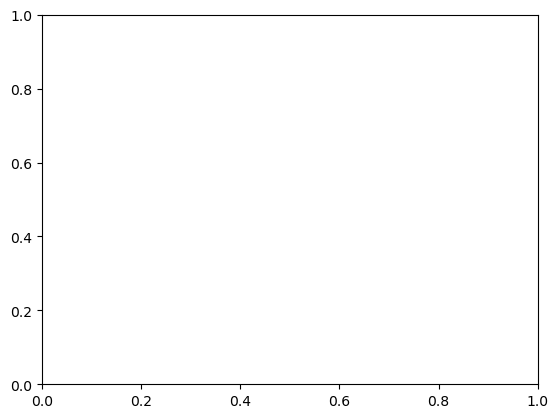

In [1101]:
for i in numvarList:
    sns.distplot(df_cat_0[i], hist = False, label = 'No Default')
    sns.distplot(df_cat_1[i], hist = False, label = 'Payment difficulty')
    plt.show()

Graph for :  SK_ID_CURR


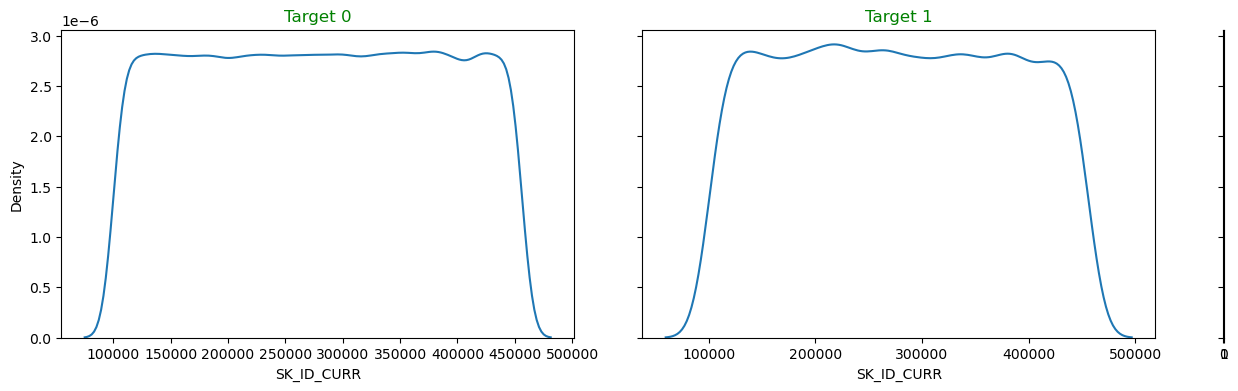

Graph for :  TARGET


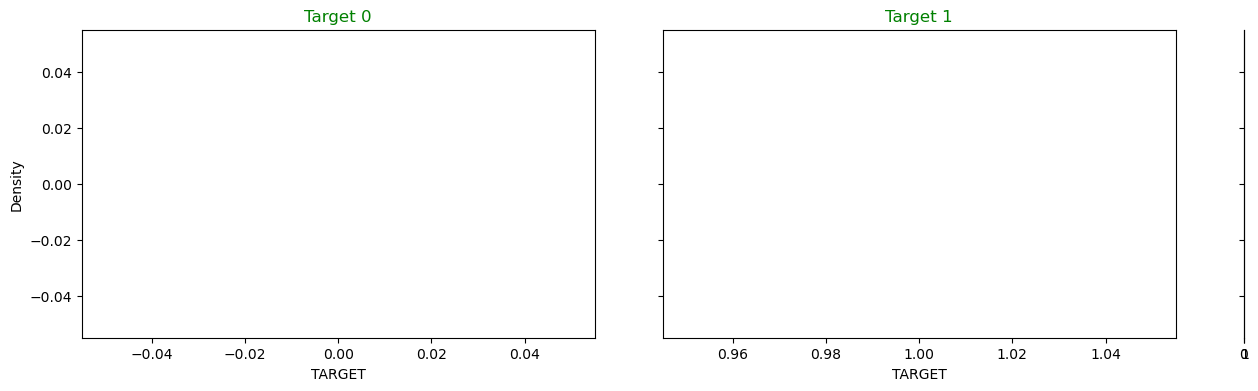

Graph for :  CNT_CHILDREN


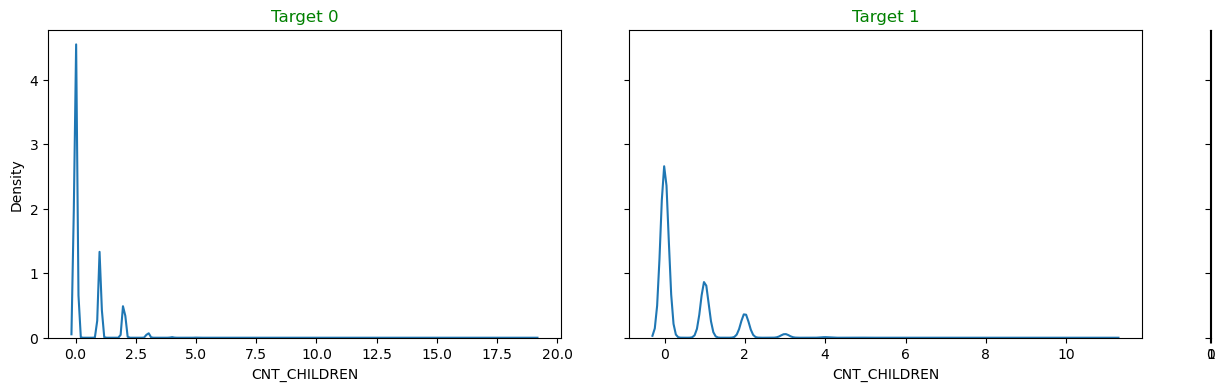

Graph for :  AMT_INCOME_TOTAL


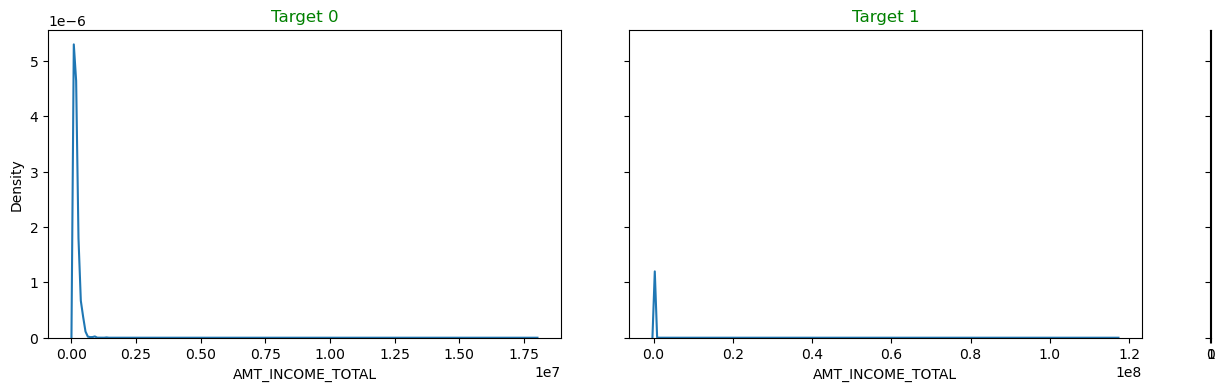

Graph for :  AMT_CREDIT


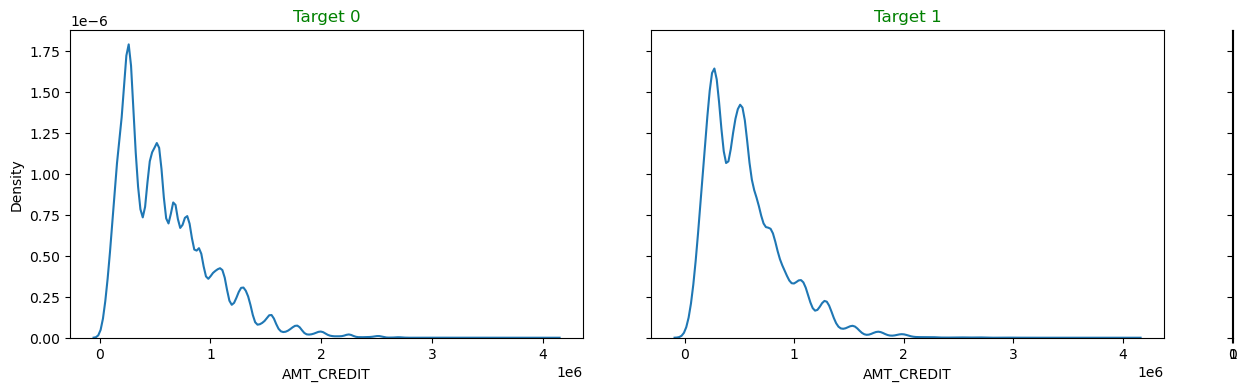

Graph for :  AMT_ANNUITY


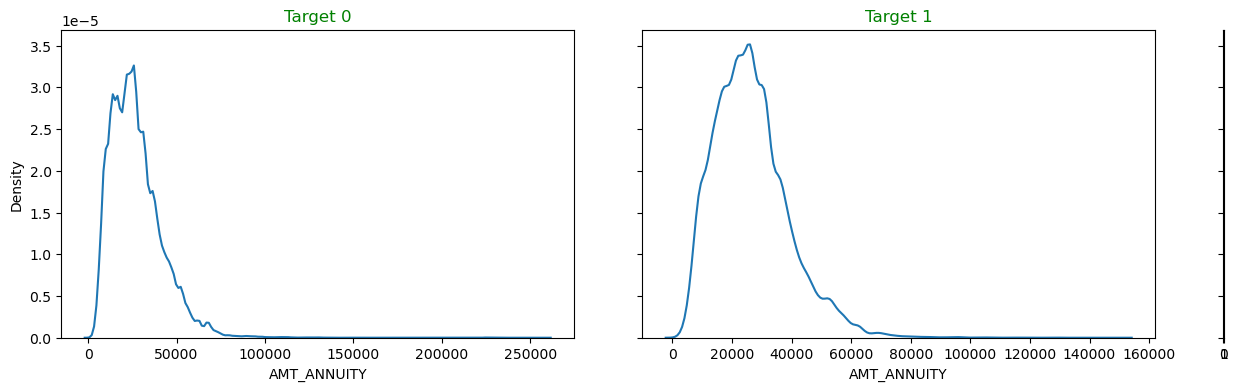

Graph for :  AMT_GOODS_PRICE


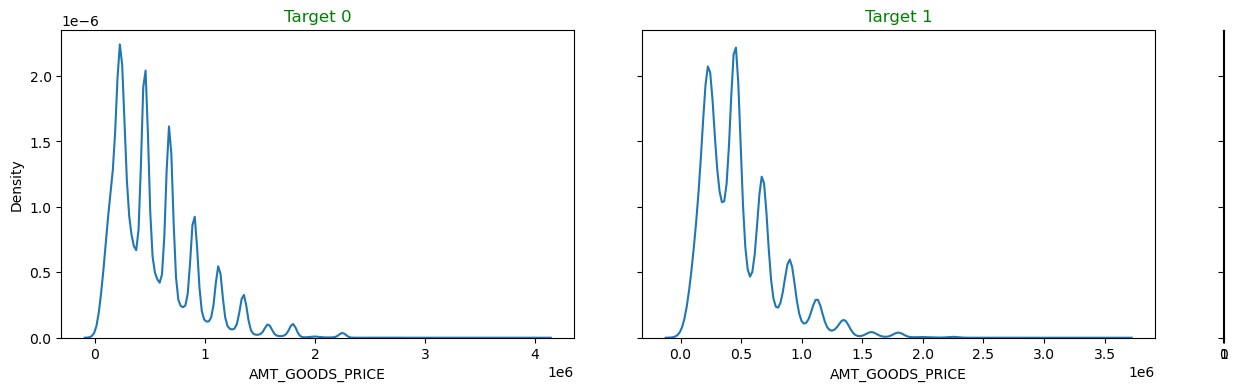

Graph for :  REGION_POPULATION_RELATIVE


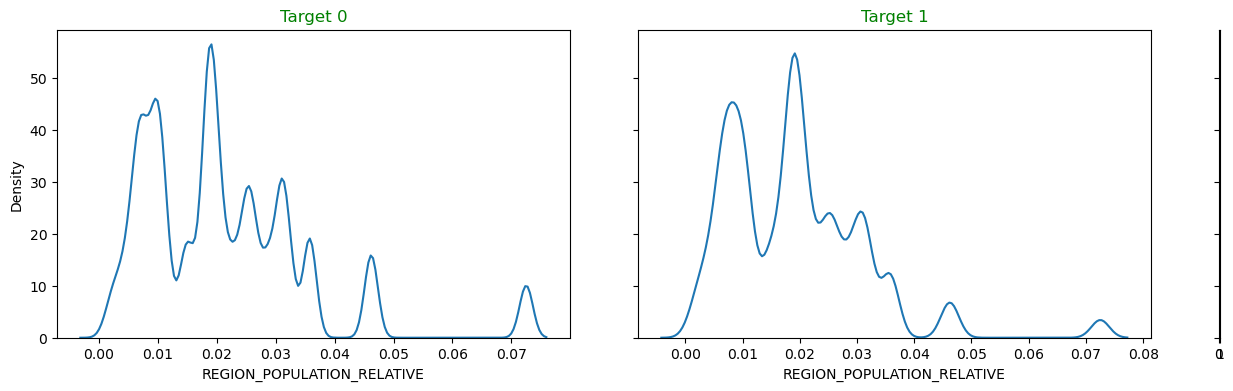

Graph for :  AGE_IN_YEARS


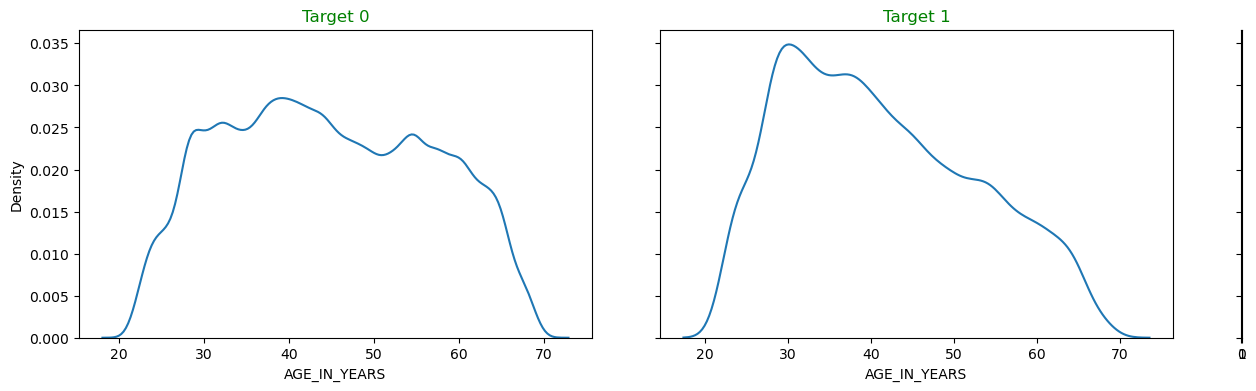

Graph for :  YEARS_EMPLOYED


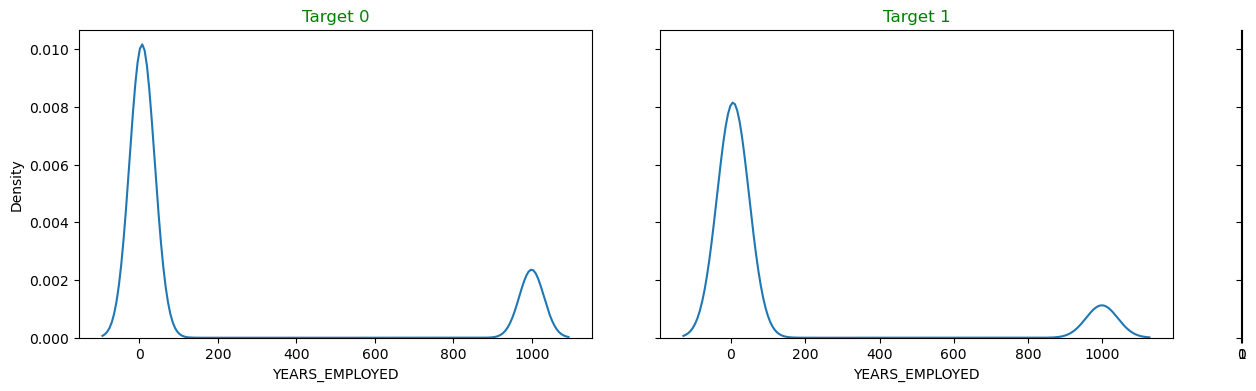

ValueError: Grouper for 'YEARS_REGISTRATION' not 1-dimensional

In [1106]:
#Plotting in separate plots to get more CLARITY 
for i in numvarList:
    cat_num_0=df_cat_0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",i)
    chart1=sns.distplot(df_cat_0[i], ax=ax1,hist = False)
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=df_cat_1[i].value_counts()
    chart2=sns.distplot(a=df_cat_1[i],ax=ax2,hist = False)    
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

In [ ]:
#Age_Group vs Income_Group 

binList=["AGE_GROUP", "INCOME_GROUP"]
for i in binList:

    cat_num_0=df_cat_0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(12,6))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='center')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=df_cat_1[i].value_counts()
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='center')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

### Bivariate Analysis on Categorical and Continuous Variable

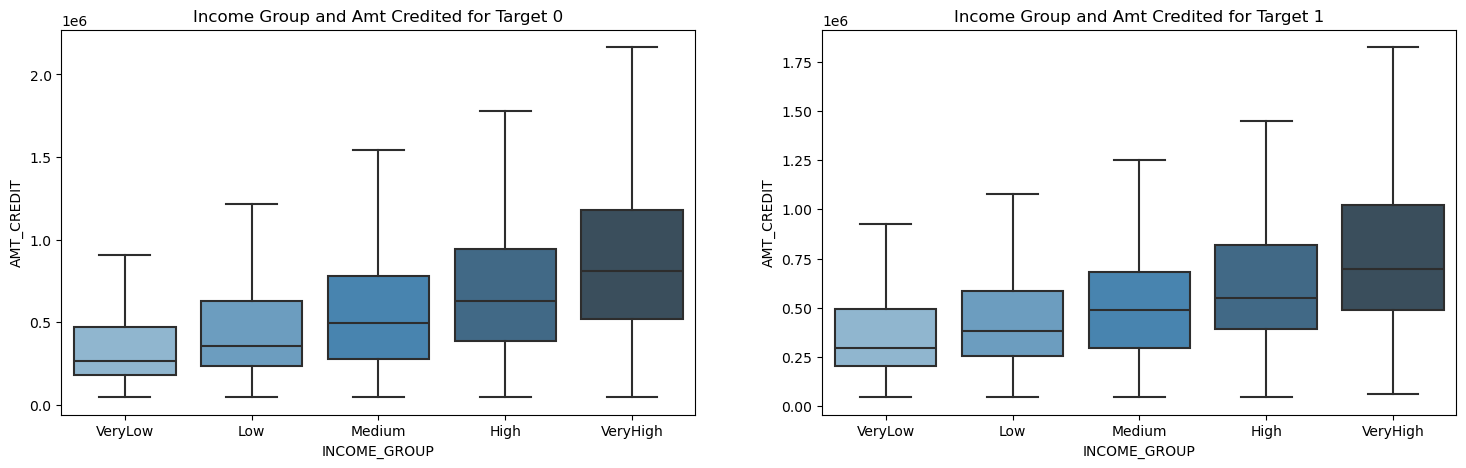

In [1107]:
## Checking INCOME_GROUP vs AMT_CREDIT for both data frames

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amt Credited for Target 0")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =df_cat_0, showfliers=False, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("Income Group and Amt Credited for Target 1")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = df_cat_1, showfliers=False, palette="Blues_d")
plt.show()

#Checking the same columns to see the affect of Very High Income group
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
appdata_df['INCOME_GROUP'] = appdata_df['INCOME_GROUP'].astype(str)
appdata_df['TARGET'] = appdata_df['TARGET'].astype(str)
plt.title("Income_Group and Payment Diffculty")
sns.countplot(x='INCOME_GROUP', hue='TARGET', data=appdata_df)
plt.show()

In [1108]:
#absolute values
res=pd.pivot_table(data=appdata_df, index='INCOME_GROUP',columns='TARGET',values='AMT_CREDIT', aggfunc="mean")
round(res,2)

TARGET                0          1
INCOME_GROUP                      
VeryLow       347868.46  373460.40
Low           456525.23  451343.70
Medium        568861.72  542580.16
High          699628.82  643297.93
VeryHigh      890186.33  786021.83

#### Categorical and Continuous Variable

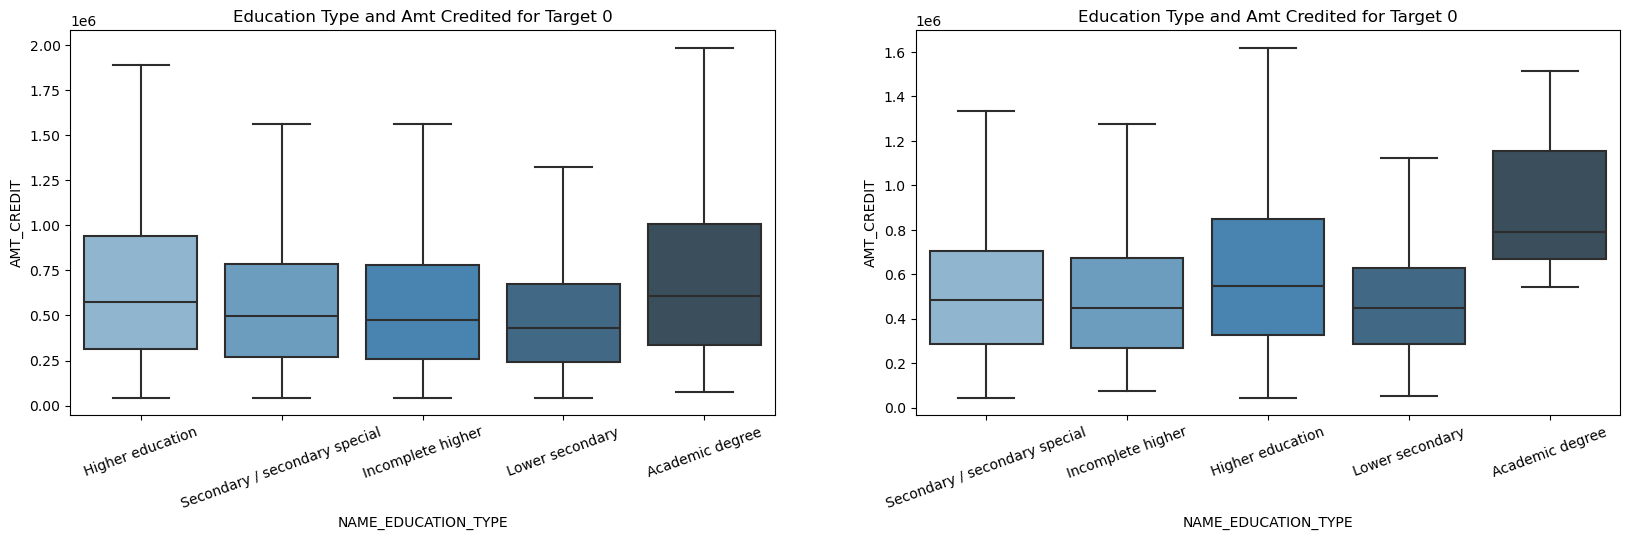

In [1109]:
## Bivariate Categoric to Continuous 

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =df_cat_0,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = df_cat_1,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()


In [1110]:
#Relationship of AMT_CREDIT vs Gender and Income type for Target 0


res=pd.pivot_table(data=df_cat_0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res,0)

CODE_GENDER                   F          M       XNA
NAME_INCOME_TYPE                                    
Businessman           1125000.0  1272857.0       NaN
Commercial associate   668844.0   685304.0  540000.0
Maternity leave        562500.0   765000.0       NaN
Pensioner              535162.0   571540.0       NaN
State servant          665132.0   695357.0       NaN
Student                372556.0   598753.0       NaN
Unemployed             787909.0  1045500.0       NaN
Working                577846.0   587183.0  352500.0

In [1111]:
#Relationship of AMT_CREDIT vs Gender and Income type for Target 1


res1=pd.pivot_table(data=df_cat_1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res1,0)

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
Pensioner             558498.0  556645.0
State servant         614062.0  616407.0
Unemployed            653250.0  546750.0
Working               537035.0  533821.0

In [1112]:
#AMT_CREDIT vs Gender and Income type for Target 0


res=pd.pivot_table(data=df_cat_0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res,0)


CODE_GENDER                   F          M       XNA
NAME_INCOME_TYPE                                    
Businessman           1125000.0  1272857.0       NaN
Commercial associate   668844.0   685304.0  540000.0
Maternity leave        562500.0   765000.0       NaN
Pensioner              535162.0   571540.0       NaN
State servant          665132.0   695357.0       NaN
Student                372556.0   598753.0       NaN
Unemployed             787909.0  1045500.0       NaN
Working                577846.0   587183.0  352500.0

In [1113]:
#AMT_CREDIT vs Gender and Income type for Target 0

res1=pd.pivot_table(data=df_cat_1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res1,0)

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
Pensioner             558498.0  556645.0
State servant         614062.0  616407.0
Unemployed            653250.0  546750.0
Working               537035.0  533821.0

###  Top Correlation

In [1115]:
#correlation for Target 0
df_corr_0 = pd.get_dummies(df_cat_0)
correlation_cat_0=df_corr_0.corr().abs()

In [1116]:
# Drop duplicate columns from correlation_cat_0
correlation_cat_0 = correlation_cat_0.loc[:, ~correlation_cat_0.columns.duplicated()]

# Create correlation DataFrame
corr_df = correlation_cat_0.where(np.triu(np.ones(correlation_cat_0.shape), k=1).astype(np.bool_)).stack().reset_index()

# Rename columns
corr_df.columns = ['Column1', 'Column2', 'Correlation']

# Drop NaN values in 'Correlation' column
corr_df.dropna(subset=['Correlation'], inplace=True)

# Sort DataFrame by 'Correlation' column in descending order
corr_df = corr_df.sort_values(by='Correlation', ascending=False)
corr_df


Column1  \
1541                            YEARS_EMPLOYED   
6694                NAME_INCOME_TYPE_Pensioner   
1419                            YEARS_EMPLOYED   
2387                  OBS_30_CNT_SOCIAL_CIRCLE   
529                                 AMT_CREDIT   
...                                        ...   
5999           NAME_TYPE_SUITE_Spouse, partner   
9129        NAME_HOUSING_TYPE_Rented apartment   
11714            REGION_RATING_CLIENT_W_CITY_3   
12096        WEEKDAY_APPR_PROCESS_START_SUNDAY   
8355   NAME_FAMILY_STATUS_Single / not married   

                                   Column2  Correlation  
1541                 ORGANIZATION_TYPE_XNA     0.999884  
6694                 ORGANIZATION_TYPE_XNA     0.999719  
1419            NAME_INCOME_TYPE_Pensioner     0.999604  
2387              OBS_60_CNT_SOCIAL_CIRCLE     0.998508  
529                        AMT_GOODS_PRICE     0.986966  
...                                    ...          ...  
5999       ORGANIZATION_TYPE_Trade: type 3     0.000004  
9129                ORGANIZATION_TYPE_Bank     0.000004  
11714           ORGANIZATION_TYPE_Religion     0.000002  
12096                     INCOME_GROUP_Low     0.000002  
8355   ORGANIZATION_TYPE_Transport: type 3     0.000001  

[15755 rows x 3 columns]

In [1102]:
# Drop non-numeric columns from df_cat_1
df_corr_1 = df_cat_1.select_dtypes(include=[np.number])

# Compute correlation
correlation_cat_1 = df_corr_1.corr().abs()

# Create correlation DataFrame
corr_df1 = correlation_cat_1.where(np.triu(np.ones(correlation_cat_1.shape), k=1).astype(np.bool_)).stack().reset_index()
corr_df1.columns = ['Column1', 'Column2', 'Correlation']
corr_df1.dropna(subset=['Correlation'], inplace=True)
corr_df1 = corr_df1.sort_values(by=['Correlation'], ascending=False)

corr_df1.head(10)


Column1                   Column2  Correlation
213        YEARS_REGISTRATION        YEARS_REGISTRATION     0.999478
274  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.998269
230          YEARS_ID_PUBLISH          YEARS_ID_PUBLISH     0.997524
76                 AMT_CREDIT           AMT_GOODS_PRICE     0.982854
35               CNT_CHILDREN           CNT_FAM_MEMBERS     0.885484
286  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE     0.868994
98                AMT_ANNUITY           AMT_GOODS_PRICE     0.752891
75                 AMT_CREDIT               AMT_ANNUITY     0.752195
161              AGE_IN_YEARS            YEARS_EMPLOYED     0.582303
285  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.337181

###  Analysis on Continuous Variables

In [1103]:
bivVar1=corr_df.head(10)['Column1'].tolist()
bivVar1

['YEARS_EMPLOYED',
 'NAME_INCOME_TYPE_Pensioner',
 'YEARS_EMPLOYED',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT',
 'REGION_RATING_CLIENT_1',
 'REGION_RATING_CLIENT_2',
 'REGION_RATING_CLIENT_3',
 'NAME_EDUCATION_TYPE_Higher education',
 'CNT_CHILDREN']

In [1104]:
bivVar2=corr_df.head(10)['Column2'].tolist()
bivVar2

['ORGANIZATION_TYPE_XNA',
 'ORGANIZATION_TYPE_XNA',
 'NAME_INCOME_TYPE_Pensioner',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY_1',
 'REGION_RATING_CLIENT_W_CITY_2',
 'REGION_RATING_CLIENT_W_CITY_3',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'CNT_FAM_MEMBERS']

In [1105]:
df_corr_1.corr().abs()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                    1.000000      0.005144          0.010165   
CNT_CHILDREN                  0.005144      1.000000          0.004796   
AMT_INCOME_TOTAL              0.010165      0.004796          1.000000   
AMT_CREDIT                    0.001290      0.001675          0.038131   
AMT_ANNUITY                   0.007578      0.031257          0.046421   
AMT_GOODS_PRICE               0.001801      0.008122          0.037647   
REGION_POPULATION_RELATIVE    0.006301      0.031975          0.009135   
AGE_IN_YEARS                  0.001160      0.259112          0.003145   
YEARS_EMPLOYED                0.005165      0.192867          0.014978   
YEARS_REGISTRATION            0.006342      0.149154          0.000158   
YEARS_ID_PUBLISH              0.002539      0.032299          0.004215   
CNT_FAM_MEMBERS               0.003816      0.885484          0.006654   
HOUR_APPR_PROCESS_START       0.005004      0.023899          0.013775   
EXT_SOURCE_2                  0.006452      0.012260          0.007154   
OBS_30_CNT_SOCIAL_CIRCLE      0.009395      0.025804          0.004709   
DEF_30_CNT_SOCIAL_CIRCLE      0.005549      0.001448          0.005186   
OBS_60_CNT_SOCIAL_CIRCLE      0.009058      0.025180          0.004616   
DEF_60_CNT_SOCIAL_CIRCLE      0.009428      0.005106          0.004866   
DAYS_LAST_PHONE_CHANGE        0.002455      0.011547          0.002429   
AMT_REQ_CREDIT_BUREAU_HOUR    0.011106      0.000316          0.001079   
AMT_REQ_CREDIT_BUREAU_DAY     0.007388      0.011255          0.000135   
AMT_REQ_CREDIT_BUREAU_WEEK    0.003075      0.009316          0.000941   
AMT_REQ_CREDIT_BUREAU_MON     0.005180      0.008852          0.005718   
AMT_REQ_CREDIT_BUREAU_QRT     0.001614      0.013029          0.001037   
AMT_REQ_CREDIT_BUREAU_YEAR    0.005442      0.021572          0.006802   
YEARS_REGISTRATION            0.006428      0.148968          0.000150   
YEARS_ID_PUBLISH              0.002932      0.031677          0.003478   

                            AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                    0.001290     0.007578         0.001801   
CNT_CHILDREN                  0.001675     0.031257         0.008122   
AMT_INCOME_TOTAL              0.038131     0.046421         0.037647   
AMT_CREDIT                    1.000000     0.752195         0.982854   
AMT_ANNUITY                   0.752195     1.000000         0.752891   
AMT_GOODS_PRICE               0.982854     0.752891         1.000000   
REGION_POPULATION_RELATIVE    0.069161     0.071690         0.076303   
AGE_IN_YEARS                  0.135172     0.014076         0.135418   
YEARS_EMPLOYED                0.001939     0.081210         0.006740   
YEARS_REGISTRATION            0.025854     0.034279         0.025556   
YEARS_ID_PUBLISH              0.052329     0.016767         0.056057   
CNT_FAM_MEMBERS               0.051224     0.075711         0.047245   
HOUR_APPR_PROCESS_START       0.031782     0.031236         0.044251   
EXT_SOURCE_2                  0.120848     0.116305         0.130529   
OBS_30_CNT_SOCIAL_CIRCLE      0.019098     0.004463         0.019710   
DEF_30_CNT_SOCIAL_CIRCLE      0.025979     0.022394         0.021980   
OBS_60_CNT_SOCIAL_CIRCLE      0.019487     0.005500         0.020272   
DEF_60_CNT_SOCIAL_CIRCLE      0.030880     0.027495         0.026433   
DAYS_LAST_PHONE_CHANGE        0.110851     0.079870         0.117820   
AMT_REQ_CREDIT_BUREAU_HOUR    0.003771     0.012968         0.002361   
AMT_REQ_CREDIT_BUREAU_DAY     0.004346     0.000074         0.005535   
AMT_REQ_CREDIT_BUREAU_WEEK    0.010598     0.028784         0.010971   
AMT_REQ_CREDIT_BUREAU_MON     0.056227     0.049000         0.059218   
AMT_REQ_CREDIT_BUREAU_QRT     0.007201     0.007261         0.006057   
AMT_REQ_CREDIT_BUREAU_YEAR    0.009317     0.007090         0.011241   
YEARS_REGISTRATION            0.026015     0.033964         0.025781   
YEARS_ID_PU

# Previous Application Data

In [1124]:
# Reading the csv file 'previous_application.csv' using 'read_csv'
prev_df=pd.read_csv('previous_application.csv')

prev_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [1125]:
# Checking columns with  missing values

prev_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [1120]:
# Checking % of missing values

prev_df.isnull().sum()/len(prev_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [1122]:
#As the DF is massive, deleting rows withy Null values for AMT_ANNUITY, AMT_GOODS_PRICE. We need these columns for 
#analysis as seen in application data frame and hence not deleting the columns

prev_df = prev_df.dropna(axis=0, subset=['AMT_ANNUITY'])
prev_df = prev_df.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
prev_df.isnull().sum()/len(prev_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [1123]:
#Checking columns with >20% NULL values

print(prev_df.columns[(prev_df.isnull().sum() * 100 / prev_df.shape[0]) > 20])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [ ]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)

In [ ]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']=="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)

In [ ]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DRAWING'].value_counts(dropna=True)

In [ ]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DUE'].value_counts(dropna=True)

In [ ]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_LAST_DUE_1ST_VERSION'].value_counts(dropna=True)

In [ ]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_LAST_DUE'].value_counts(dropna=True)

In [ ]:
prev_df[(prev_df['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_TERMINATION'].value_counts(dropna=True)

In [ ]:
prev_df[prev_df['NAME_CONTRACT_STATUS']!="Approved"].shape

ALL Columns mentioned above are NAN for Non approved case which is correct representation. hence Without a loan, applicant cant draw <br> and applicant will not have Insurance too. However, we will drop all these rows as we will not do any analysis with these.

In [1126]:
#Dropping all >20 null value columns
dropcol=prev_df.columns[(prev_df.isnull().sum() * 100 / prev_df.shape[0]) > 20]
prev_df.drop(axis=1, columns=dropcol, inplace=True)
prev_df.shape

(1670214, 23)

In [1127]:
#Checking columns with NULL values

prev_df.columns[(prev_df.isnull().sum()>0)]

Index(['AMT_CREDIT', 'PRODUCT_COMBINATION'], dtype='object')

In [1128]:
prev_df.describe()

SK_ID_PREV    SK_ID_CURR  AMT_APPLICATION    AMT_CREDIT  \
count  1.670214e+06  1.670214e+06     1.670214e+06  1.670213e+06   
mean   1.923089e+06  2.783572e+05     1.752339e+05  1.961140e+05   
std    5.325980e+05  1.028148e+05     2.927798e+05  3.185746e+05   
min    1.000001e+06  1.000010e+05     0.000000e+00  0.000000e+00   
25%    1.461857e+06  1.893290e+05     1.872000e+04  2.416050e+04   
50%    1.923110e+06  2.787145e+05     7.104600e+04  8.054100e+04   
75%    2.384280e+06  3.675140e+05     1.803600e+05  2.164185e+05   
max    2.845382e+06  4.562550e+05     6.905160e+06  6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
count             1.670214e+06            1.670214e+06   1.670214e+06   
mean              1.248418e+01            9.964675e-01  -8.806797e+02   
std               3.334028e+00            5.932963e-02   7.790997e+02   
min               0.000000e+00            0.000000e+00  -2.922000e+03   
25%               1.000000e+01            1.000000e+00  -1.300000e+03   
50%               1.200000e+01            1.000000e+00  -5.810000e+02   
75%               1.500000e+01            1.000000e+00  -2.800000e+02   
max               2.300000e+01            1.000000e+00  -1.000000e+00   

       SELLERPLACE_AREA  
count      1.670214e+06  
mean       3.139511e+02  
std        7.127443e+03  
min       -1.000000e+00  
25%       -1.000000e+00  
50%        3.000000e+00  
75%        8.200000e+01  
max        4.000000e+06

In [1129]:
#deleting some additional numerical var columns as we do not intend to use them for analysis and they dont seem relevant too

dropcol=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
prev_df.drop(axis=1, columns=dropcol, inplace=True)
prev_df.shape

(1670214, 19)

In [1130]:
# Analysing values of object variable
for i in prev_df.columns:
    if prev_df[i].dtypes=="object":
        print(prev_df[i].value_counts(normalize=True, dropna= False))
        print('\n\n')

NAME_CONTRACT_TYPE
Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: proportion, dtype: float64



WEEKDAY_APPR_PROCESS_START
TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: proportion, dtype: float64



FLAG_LAST_APPL_PER_CONTRACT
Y    0.994926
N    0.005074
Name: proportion, dtype: float64



NAME_CASH_LOAN_PURPOSE
XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journe

In [1131]:
# Deleting columns mentioned above
dropcol=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
prev_df.drop(axis=1, columns=dropcol, inplace=True)
prev_df.shape

(1670214, 13)

## <font color=blue> Univariate Analysis
### Categorical Nominal

NAME_CONTRACT_TYPE
Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: proportion, dtype: float64


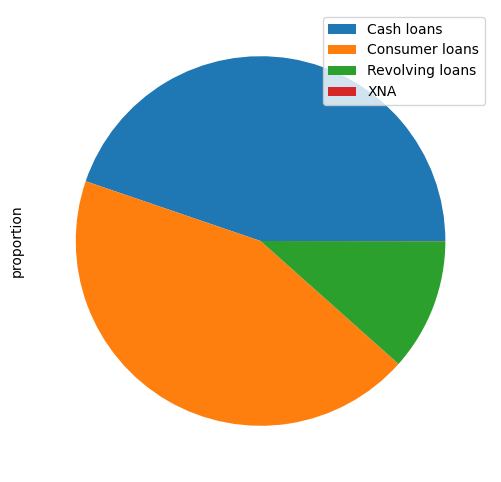



FLAG_LAST_APPL_PER_CONTRACT
Y    0.994926
N    0.005074
Name: proportion, dtype: float64


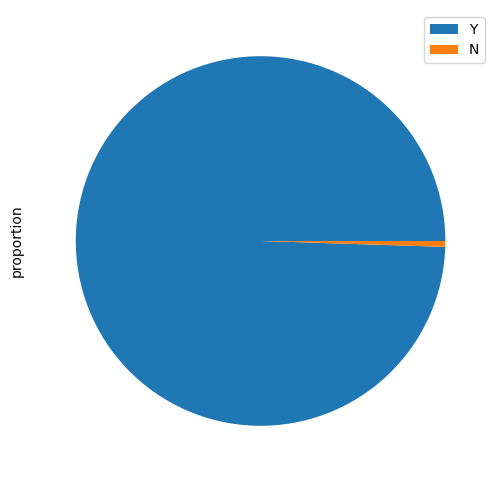



NAME_CONTRACT_STATUS
Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: proportion, dtype: float64


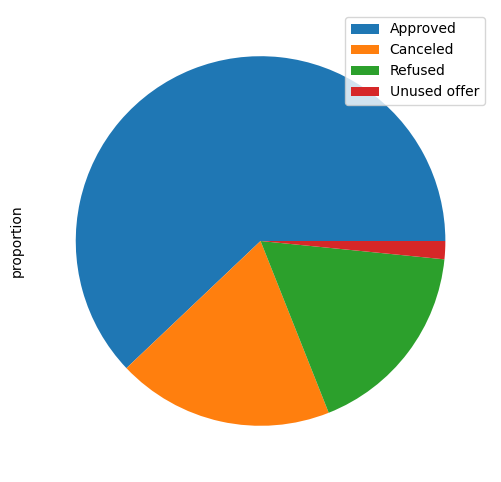



NAME_CLIENT_TYPE
Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: proportion, dtype: float64


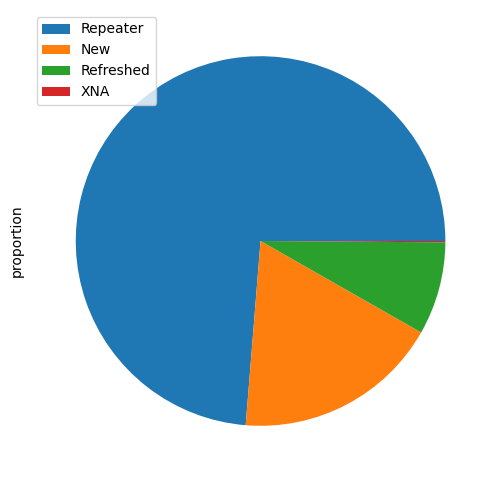



NAME_PORTFOLIO
POS      0.413726
Cash     0.276350
XNA      0.222864
Cards    0.086806
Cars     0.000254
Name: proportion, dtype: float64


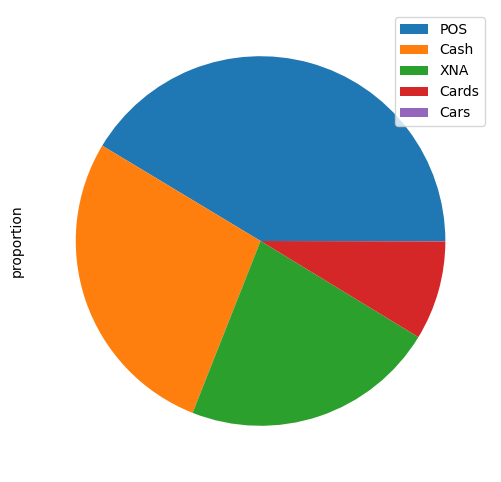



CHANNEL_TYPE
Credit and cash offices       0.431063
Country-wide                  0.296184
Stone                         0.126980
Regional / Local              0.064978
Contact center                0.042687
AP+ (Cash loan)               0.034155
Channel of corporate sales    0.003682
Car dealer                    0.000271
Name: proportion, dtype: float64


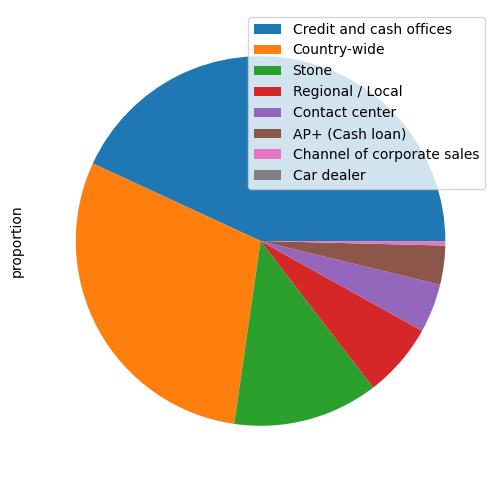



NAME_SELLER_INDUSTRY
XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: proportion, dtype: float64


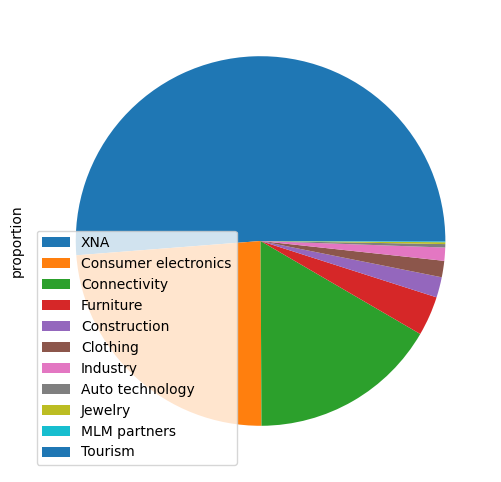



NAME_YIELD_GROUP
XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: proportion, dtype: float64


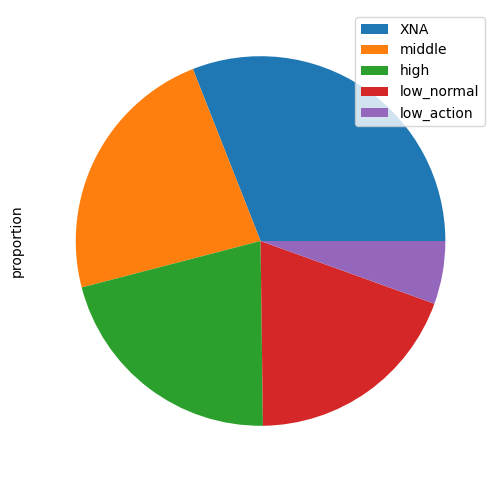



PRODUCT_COMBINATION
Cash                              0.171230
POS household with interest       0.157837
POS mobile with interest          0.132121
Cash X-Sell: middle               0.086146
Cash X-Sell: low                  0.077983
Card Street                       0.067406
POS industry with interest        0.059174
POS household without interest    0.049639
Card X-Sell                       0.048247
Cash Street: high                 0.035707
Cash X-Sell: high                 0.035505
Cash Street: middle               0.020751
Cash Street: low                  0.020257
POS mobile without interest       0.014419
POS other with interest           0.014297
POS industry without interest     0.007545
POS others without interest       0.001530
NaN                               0.000207
Name: proportion, dtype: float64


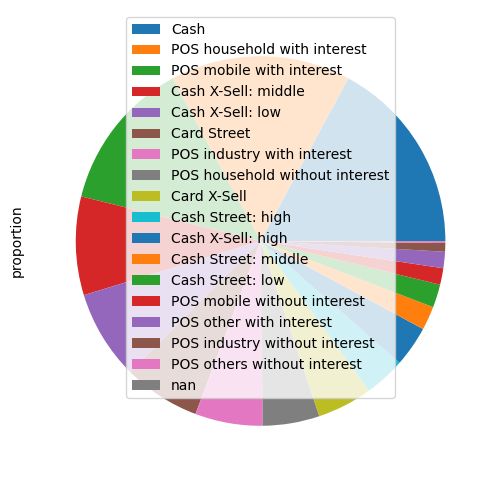

In [1132]:
#Checking all object types Variables and their values
for i in prev_df.columns:
    if prev_df[i].dtypes=="object":
        print(prev_df[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        prev_df[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
        print("\n")
        
                
        

##### **Few notable points**
    1. This dataframe has a differnt type of loan called Consumer Loan, which was not there in Application data frame. 55% of loans are consumer loans. 37% cash loans and rest revolving
    2. Approved loans are 79% and refused, cancelled, unused - rest. **IMBALANCE IN DATA**
    3. 67% are repeaters. NAME_CLIENT_TYPE also has some null values showing as XNA
    4. 55% of the applicants have taken loan for POS purchase.
    5. Name seller industry has 37% XNA values, Consumer electronics is next highest category at 30%



In [ ]:
prev_df.describe()

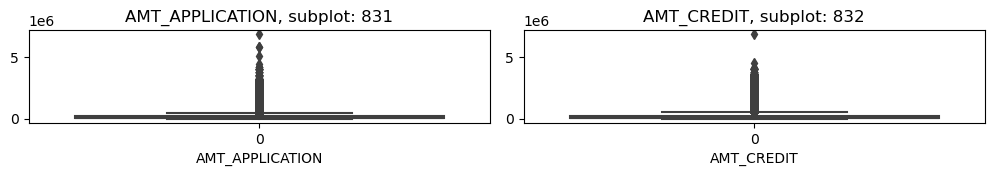

In [1133]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in prev_df.columns:
    if prev_df[i].dtypes=="float64" or prev_df[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(prev_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

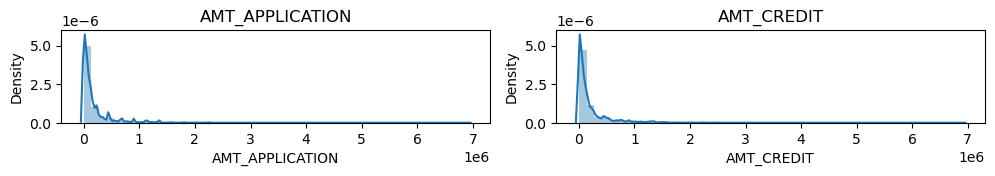

In [1134]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in prev_df.columns:
    if str(prev_df[i].dtypes) in ["float64","float32"]:
        plt.subplot(a, b, c)
        plt.title(i)
        plt.xlabel(i)
        sns.distplot(a=prev_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

In [1135]:
#using zscore to find out Outliers (>97%)

for i in prev_df.columns:
    if prev_df[i].dtypes=="float64" or prev_df[i].dtypes=="float32":
        print( i, ":", end= " ")
        print(prev_df.iloc[np.where(np.abs(ss.zscore(prev_df[i])>2))].shape, end=" ")
        print("Percentage of Outlier rows: ", round((prev_df.iloc[np.where(np.abs(ss.zscore(prev_df[i])>2))].shape[0]/prev_df.shape[0]*100), 2))          

AMT_APPLICATION : (89784, 13) Percentage of Outlier rows:  5.38
AMT_CREDIT : (0, 13) Percentage of Outlier rows:  0.0


## <font color=blue> Bivariate Analysis

### Categorical and Categorical Variable

In [ ]:
cols=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']


a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in cols:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=prev_df, hue='NAME_CONTRACT_STATUS')
    c = c + 1

fig.tight_layout()
plt.show()


## <font color = blue> Top Correlations

In [1137]:
df_corr_prev=prev_df.drop(axis=1,columns=['SK_ID_CURR','SK_ID_PREV'] )

correlation=df_corr_prev.corr().abs()

ValueError: could not convert string to float: 'Consumer loans'

In [ ]:


corr_prev = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_prev.columns=['Column1','Column2','Correlation']
corr_prev.dropna(subset=['Correlation'],inplace=True)
corr_prev = corr_prev.sort_values(by=['Correlation'], ascending=False)

corr_prev


In [ ]:
plt.figure(figsize=[20,8])
sns.pairplot(prev_df[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show()    
    
    

In [ ]:
# Checking contract status vs name client type aggregating over application amount

res=pd.pivot_table(data=prev_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

In [ ]:
# Checking contract status vs name client type aggregating over AMT CREDIT

res=pd.pivot_table(data=prev_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

In [ ]:
# Checking contract status vs name client type aggregating over AMOUNT GOOD PRICE

res=pd.pivot_table(data=prev_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

# Merged Data frames Analysis

In [ ]:
#checking if any duplicate values in SK_ID_PREV
duplicate = prev_df[prev_df.duplicated(subset='SK_ID_CURR')]
duplicate.shape

In [ ]:
df=pd.merge( appdata_df,prev_df, how='left', on="SK_ID_CURR")
df.head()


In [ ]:
df.shape

In [ ]:
# Plotting Name contract status to check % of default, ie Target 0 and 1

contract=df['NAME_CONTRACT_STATUS'].unique()
contract

In [ ]:
# Plotting Name contract status to check % of default, ie Target 0 and 1

contract=df['NAME_CONTRACT_STATUS'].unique()
contract

In [ ]:
# Number of Defaults in approved cases
approvedDefault=df[(df['NAME_CONTRACT_STATUS']=="Approved") & (df['TARGET']==1)]
approvedDefault.shape

In [ ]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

In [ ]:
#Checking "NAME_CONTRACT_STATUS", "AGE_GROUP",aggregating on Target

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

In [ ]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on AMT_CREDIT

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

In [ ]:
cols=['INCOME_GROUP','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE",'OWN_CAR_flag','OWN_REALTY_flag' ]

for i in cols:
    print(approvedDefault[i].value_counts(normalize=True))
    print('\n')

#### <font color = red> **Default cases in Approved Applications"</font>
    All the below variables were established in analysis of Application dataframe as leading to default.
    Checked these against the approved application and default cases and it proves to be correct
  **Default High**<br>
        'INCOME_GROUP' - Medium income<br> 
        'AGE_GROUP - 25-35, followed by 35-45<br>
        'NAME_INCOME_TYPE' - Working <br>
        'OCCUPATION_TYPE' - Labourers 31%<br>
        'ORGANIZATION_TYPE' - Business type 3<br>
        'OWN_CAR_flag' - 31% dont have car<br>
        'OWN_REALTY_flag' - 70% dont have own home

# Case Summary
   
### *Defaulters' demography*

#### After analyzing the Application dataframe, the following variables emerged as significant indicators of default:
        - 
Medium income earner        - s
Individuals aged between 25-35 years, followed by those aged between 35-45 yea        - rs
Ma        - les
Unemployed individ        - uals
Occupations such as laborers, salesmen, and dr        - ivers
Business         - type 3
Individuals who do not own
                 a house
Additionally, other important factors to consider i        - nclude:

Frequency of changing phone numbers, with a lower figure indicating potenti        - al concern
Number of Bureau hits in the last week or month, where zero hits ar        - e favorable
Discrepancies between income levels and the value of goods purchased, with low income and high-value goods posi        - ng a concern
Previous loan application statuses, such as Refused, Cancelled, or Unused, which also result in defaults. This suggests that des          pite previous refusals or cancellations, the financial company approved the current application, leading to defaults
        
### *Credible Applications- Unused applications often have lower loan amounts, potentially explaining the lack of usage.    
- Female applicants should be given extra consideration, as they exhibit lower default rates.    
- Although 60% of defaulters are employed, this does not imply that working applicants should be automatically refused. Careful examination o           o other parameters is necessary    .
- In cases where previous applications were refused, cancelled, or unused, but payments are being made on time in the current application, it suggests that incorrect decisions may have been made in those instances.n those cases.